In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'split']
列表名： ['STACK', 'RF', 'NB', 'KNN', 'SVM', 'LR']


In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'LR'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/Train-FS-ZSCORE-MI-LR.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/InternalTest-FS-ZSCORE-MI-LR.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI-LR.csv",index=None)



In [4]:
train.shape

(59, 27)

In [5]:
test.shape

(15, 27)

In [6]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [8]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/Train-FS-ZSCORE-MI-LR.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CT_lbp-3D-k_gldm_DependenceEntropy                    59 non-null     float64
 1   CT_wavelet-LLH_glcm_Correlation                       59 non-null     float64
 2   CT_wavelet-HLH_glrlm_RunEntropy                       59 non-null     float64
 3   CT_wavelet-HHH_firstorder_Skewness                    59 non-null     float64
 4   CT_original_shape_MajorAxisLength                     59 non-null     float64
 5   CT_wavelet-LLH_firstorder_10Percentile                59 non-null     float64
 6   CT_wavelet-LHH_glrlm_LongRunHighGrayLevelEmphasis     59 non-null     float64
 7   CT_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized  59 non-null     float64
 8   CT_wavelet-HLL_firstorder_Median                      59 non-n

count   mean   std    min  \
CT_lbp-3D-k_gldm_DependenceEntropy                 59.000 -0.000 1.009 -4.412   
CT_wavelet-LLH_glcm_Correlation                    59.000  0.000 1.009 -3.424   
CT_wavelet-HLH_glrlm_RunEntropy                    59.000 -0.000 1.009 -4.146   
CT_wavelet-HHH_firstorder_Skewness                 59.000  0.000 1.009 -2.096   
CT_original_shape_MajorAxisLength                  59.000 -0.000 1.009 -1.799   
CT_wavelet-LLH_firstorder_10Percentile             59.000  0.000 1.009 -3.549   
CT_wavelet-LHH_glrlm_LongRunHighGrayLevelEmphasis  59.000 -0.000 1.009 -1.533   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... 59.000 -0.000 1.009 -1.536   
CT_wavelet-HLL_firstorder_Median                   59.000  0.000 1.009 -3.146   
CT_wavelet-HLH_firstorder_Maximum                  59.000  0.000 1.009 -1.733   
CT_wavelet-HHL_firstorder_Maximum                  59.000 -0.000 1.009 -1.287   
CT_wavelet-HHL_firstorder_Mean                     59.000 -0.000 1.009 -2.712   
CT_wavelet-HHH_firstorder_Maximum                  59.000  0.000 1.009 -1.809   
CT_wavelet-HHH_glszm_GrayLevelNonUniformity        59.000  0.000 1.009 -0.766   
CT_wavelet2-LHL_firstorder_Mean                    59.000  0.000 1.009 -1.723   
CT_wavelet2-LHL_firstorder_Median                  59.000 -0.000 1.009 -3.122   
CT_wavelet2-LHL_glcm_ClusterShade                  59.000 -0.000 1.009 -4.689   
CT_wavelet2-LHH_firstorder_RootMeanSquared         59.000 -0.000 1.009 -1.597   
CT_wavelet2-HLL_firstorder_Skewness                59.000 -0.000 1.009 -4.757   
CT_wavelet2-HLH_firstorder_Mean                    59.000 -0.000 1.009 -3.625   
CT_wavelet2-HHH_glszm_SmallAreaEmphasis            59.000 -0.000 1.009 -1.797   
CT_lbp-3D-m1_firstorder_10Percentile               59.000 -0.000 1.009 -1.998   
CT_lbp-3D-k_glrlm_LongRunEmphasis                  59.000 -0.000 1.009 -1.505   
PET_original_shape_Flatness                        59.000  0.000 1.009 -2.320   
PET_original_shape_LeastAxisLength                 59.000 -0.000 1.009 -1.487   
PET_original_shape_Sphericity                      59.000 -0.000 1.009 -3.168   
label                                              59.000  0.441 0.501  0.000   

                                                      10%    25%    50%   75%  \
CT_lbp-3D-k_gldm_DependenceEntropy                 -1.125 -0.527  0.179 0.624   
CT_wavelet-LLH_glcm_Correlation                    -1.216 -0.229  0.338 0.538   
CT_wavelet-HLH_glrlm_RunEntropy                    -0.896 -0.572  0.153 0.636   
CT_wavelet-HHH_firstorder_Skewness                 -0.576 -0.242 -0.043 0.090   
CT_original_shape_MajorAxisLength                  -1.083 -0.644 -0.270 0.465   
CT_wavelet-LLH_firstorder_10Percentile             -1.065 -0.486  0.146 0.675   
CT_wavelet-LHH_glrlm_LongRunHighGrayLevelEmphasis  -0.968 -0.716 -0.180 0.520   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... -1.092 -0.670 -0.183 0.365   
CT_wavelet-HLL_firstorder_Median                   -0.638 -0.270 -0.164 0.199   
CT_wavelet-HLH_firstorder_Maximum                  -1.010 -0.692 -0.269 0.696   
CT_wavelet-HHL_firstorder_Maximum                  -0.905 -0.555 -0.324 0.541   
CT_wavelet-HHL_firstorder_Mean                     -0.610 -0.256  0.015 0.205   
CT_wavelet-HHH_firstorder_Maximum                  -1.075 -0.627 -0.088 0.427   
CT_wavelet-HHH_glszm_GrayLevelNonUniformity        -0.766 -0.552 -0.381 0.237   
CT_wavelet2-LHL_firstorder_Mean                    -0.943 -0.352 -0.079 0.155   
CT_wavelet2-LHL_firstorder_Median                  -0.833 -0.355 -0.158 0.046   
CT_wavelet2-LHL_glcm_ClusterShade                  -0.679 -0.037  0.213 0.335   
CT_wavelet2-LHH_firstorder_RootMeanSquared         -0.818 -0.622 -0.285 0.238   
CT_wavelet2-HLL_firstorder_Skewness                -0.764 -0.221  0.018 0.282   
CT_wavelet2-HLH_firstorder_Mean                    -0.665 -0.288  0.011 0.242   
CT_wavelet2-HHH_glszm_SmallAreaEmphasis            -1.659 -0.555  0.152 0.658   
C

In [9]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_lbp-3D-k_gldm_DependenceEntropy                      0
CT_wavelet2-LHL_firstorder_Mean                         0
PET_original_shape_Sphericity                           0
PET_original_shape_LeastAxisLength                      0
PET_original_shape_Flatness                             0
CT_lbp-3D-k_glrlm_LongRunEmphasis                       0
CT_lbp-3D-m1_firstorder_10Percentile                    0
CT_wavelet2-HHH_glszm_SmallAreaEmphasis                 0
CT_wavelet2-HLH_firstorder_Mean                         0
CT_wavelet2-HLL_firstorder_Skewness                     0
CT_wavelet2-LHH_firstorder_RootMeanSquared              0
CT_wavelet2-LHL_glcm_ClusterShade                       0
CT_wavelet2-LHL_firstorder_Median                       0
CT_wavelet-HHH_glszm_GrayLevelNonUniformity             0
CT_wavelet-LLH_glcm_Correlation                         0
CT_wavelet-HHH_firstorder_Maximum                       0
CT_wavelet-HHL_firstorder_Mean                          0
CT_wavelet-HHL

In [10]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [11]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/Train-FS-ZSCORE-MI-LR.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/InternalTest-FS-ZSCORE-MI-LR.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [12]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [13]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [14]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [15]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [16]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [17]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [18]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [19]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [20]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [21]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, class_names = ["EGFR E19", "EGFR E21"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [22]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, class_names = ["EGFR E19", "EGFR E21"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [24]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [25]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [26]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [27]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [28]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [29]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [30]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.650000
Naive Bayes: 0.400000
KNN: 0.550000
SVM: 0.550000
ANN: 0.650000
CART: 0.450000
BaggedTrees: 0.500000
RF: 0.650000
AdaBoost: 0.550000
GBM: 0.550000
XGBoost: 0.550000
LightGBM: 0.650000
CatBoost: 0.450000
NGBoost: 0.550000

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.691          0.650
1          Naive Bayes           0.767          0.400
2                  KNN           0.684          0.550
3                  SVM           0.874          0.550
4                  ANN           1.000          0.650
5                 CART           1.000          0.450
6          BaggedTrees           1.000          0.500
7                   RF           1.000          0.650
8             AdaBoost           1.000          0.550
9                  GBM           1.000          0.550
10

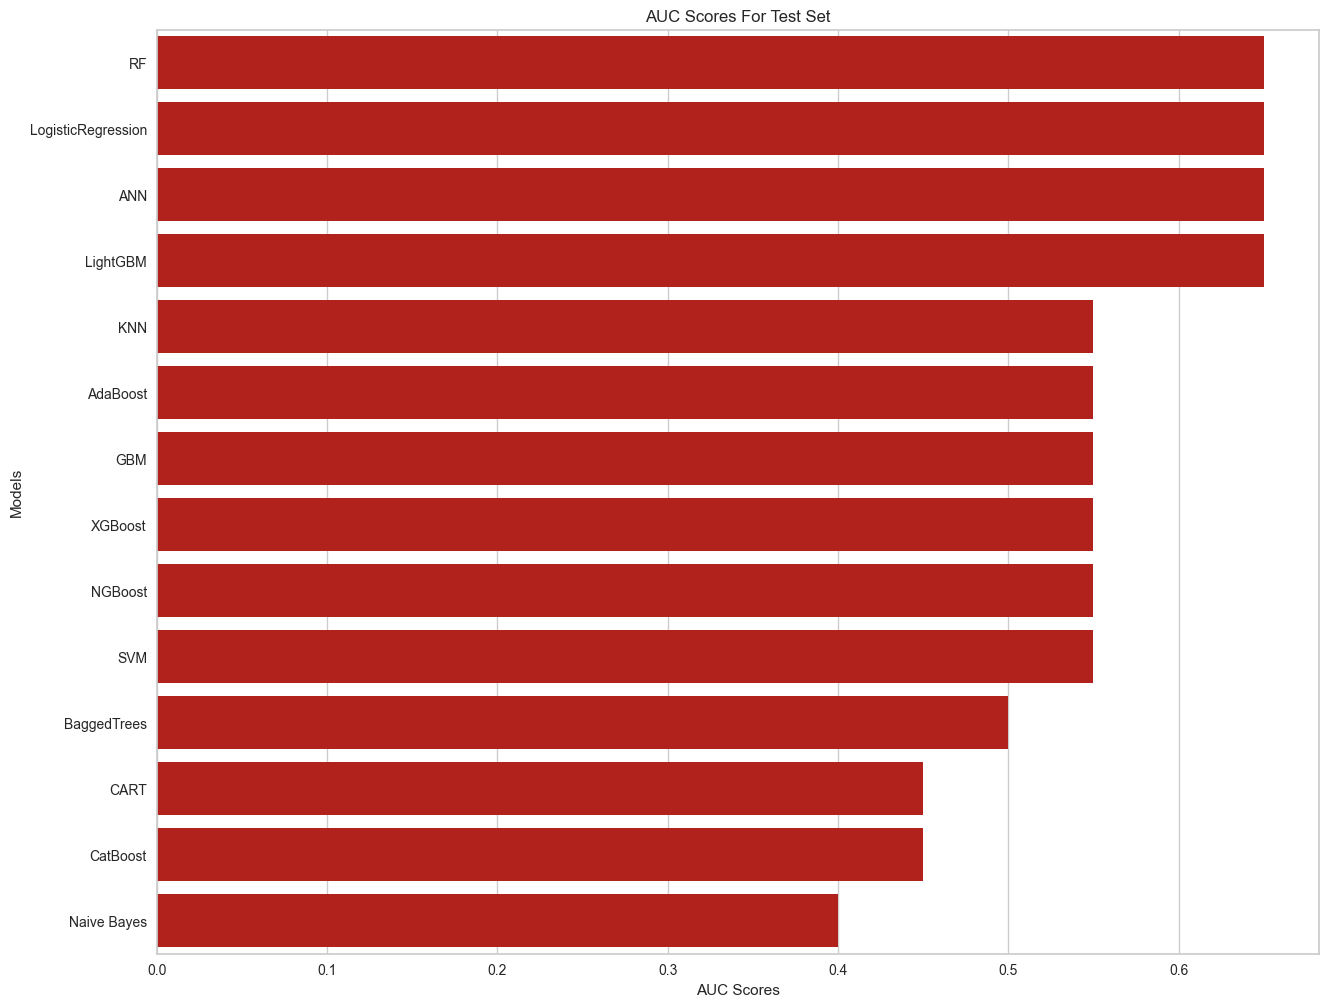

In [31]:
evaluate_classification_model_holdout(base_models)

In [27]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


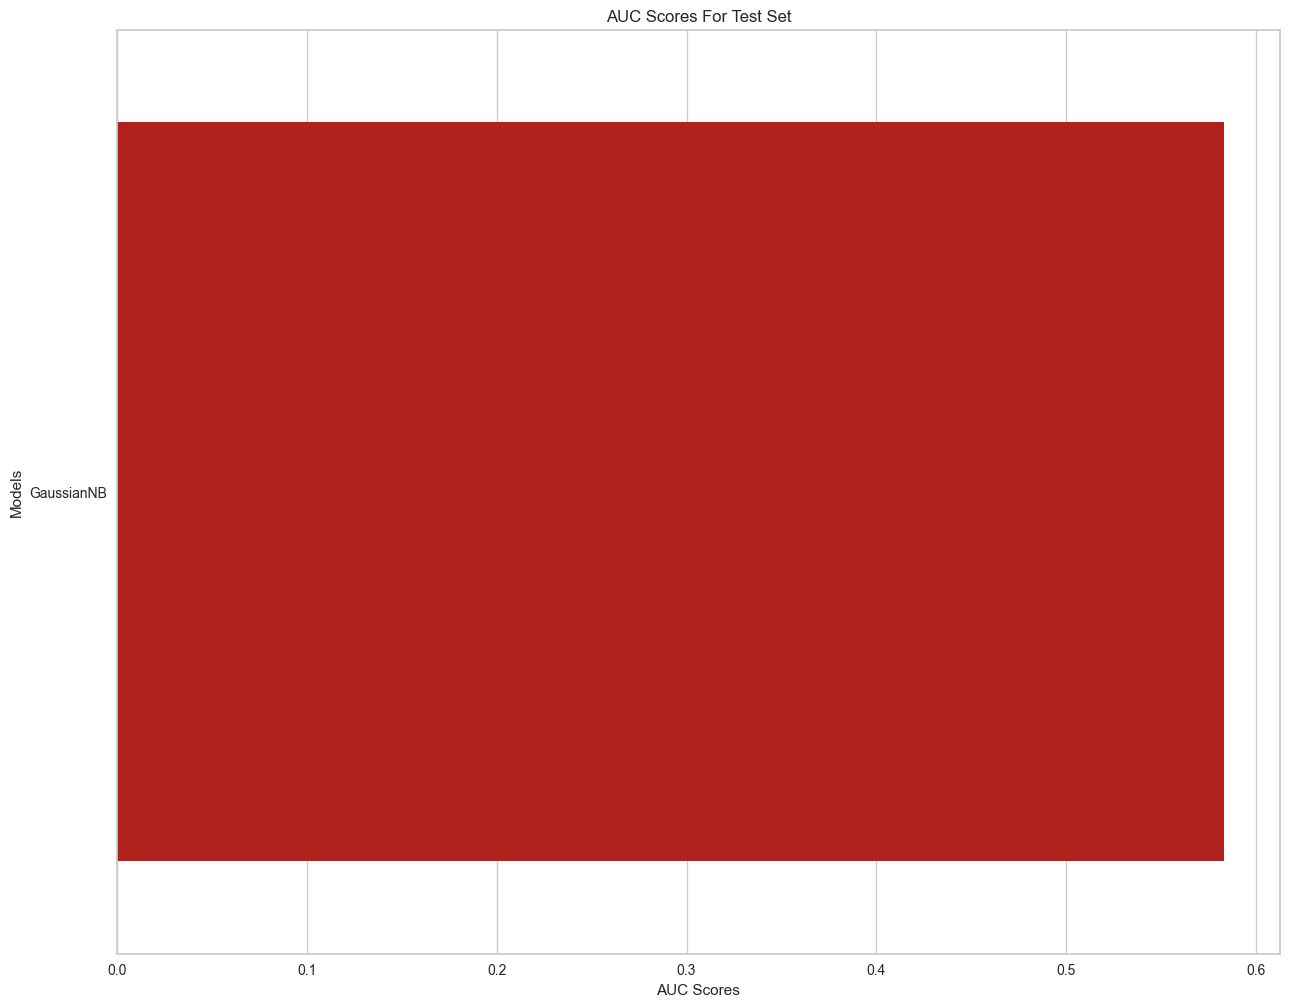

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

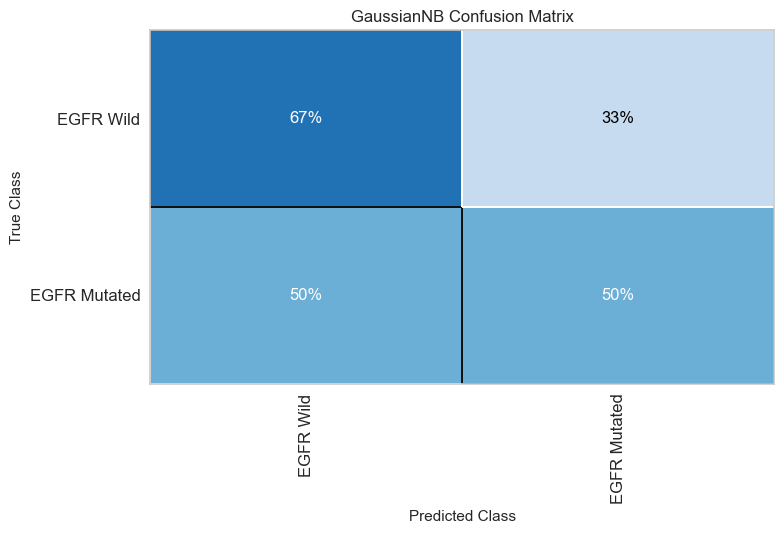

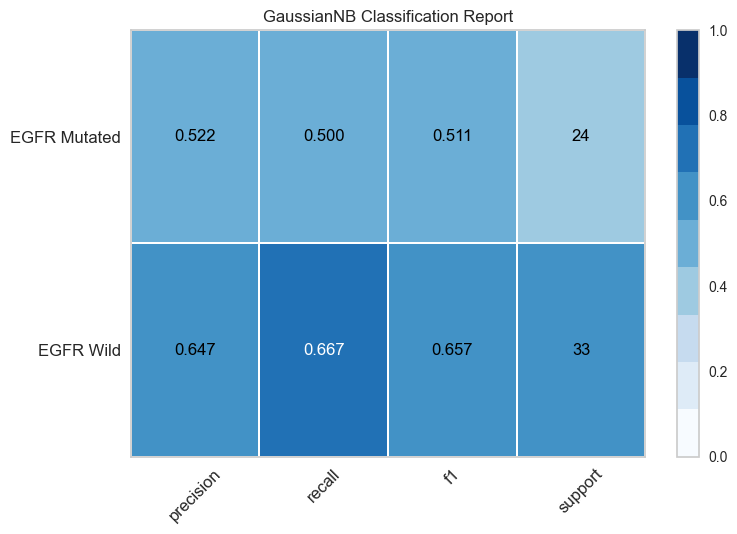

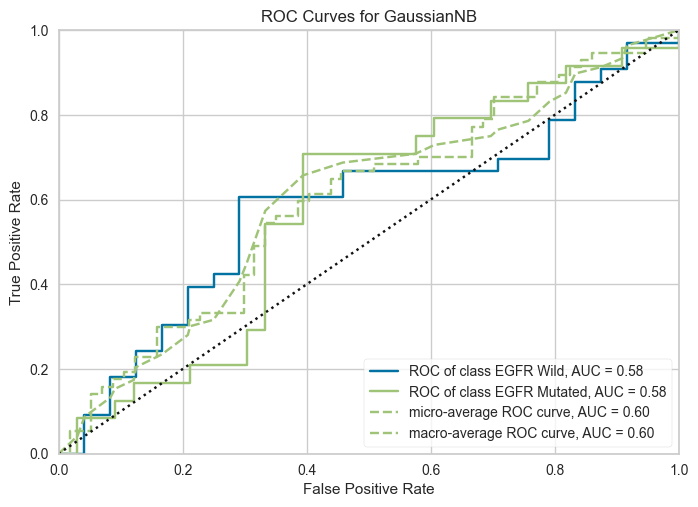

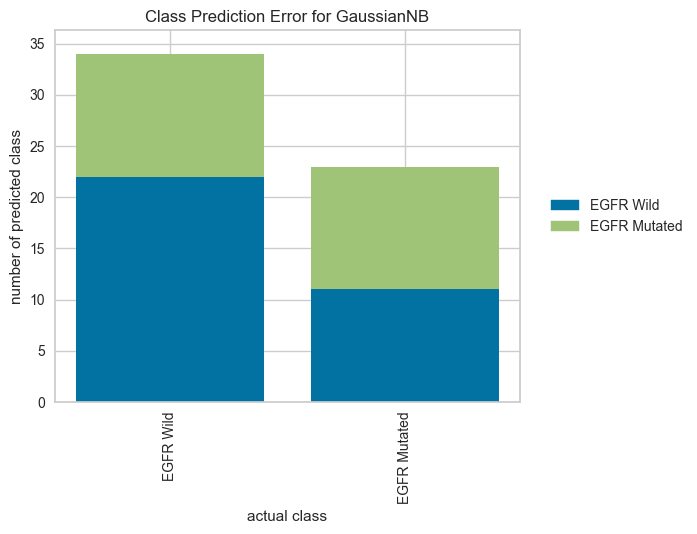

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


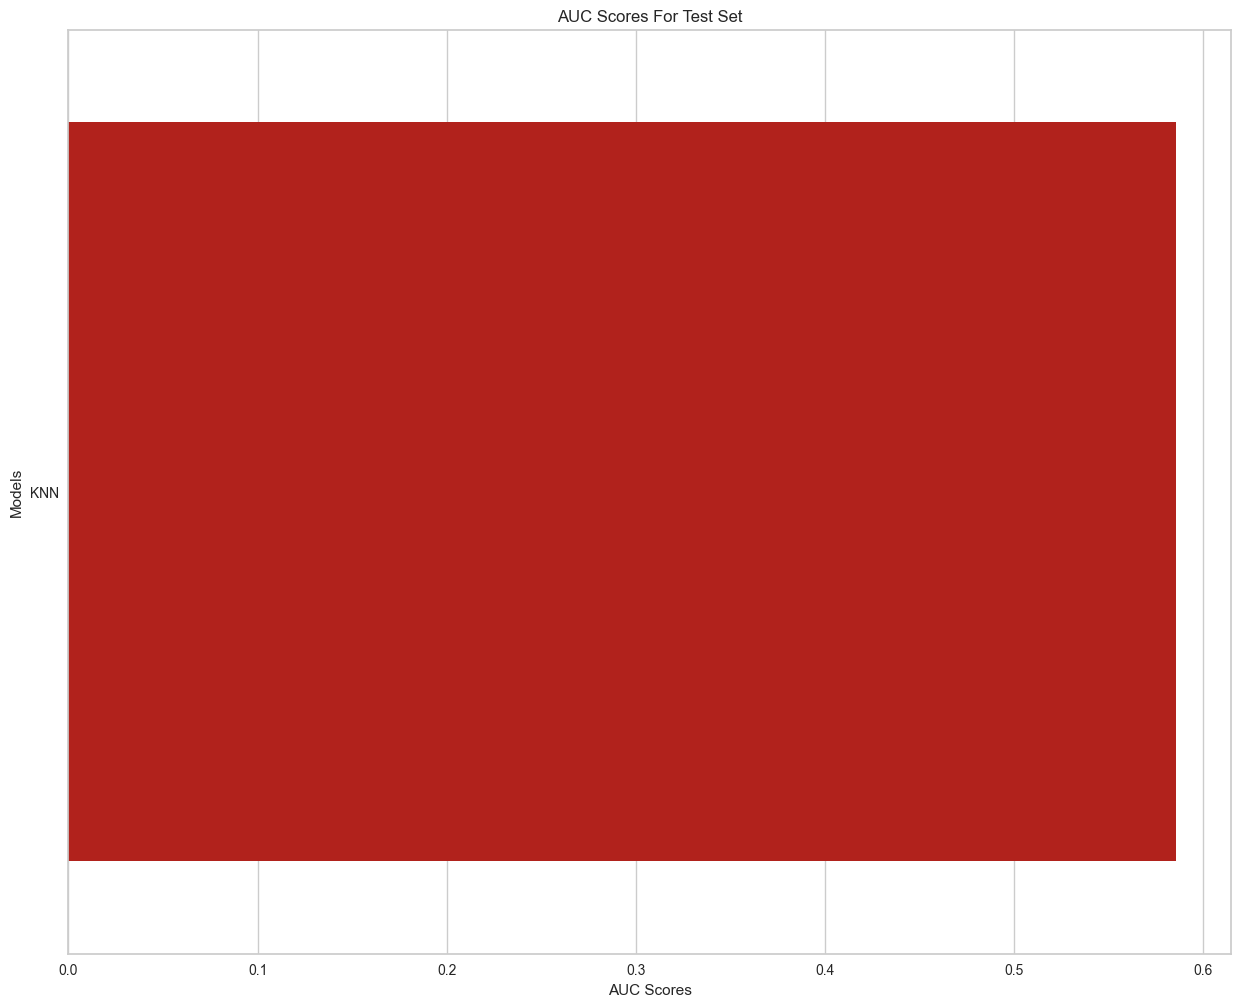

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

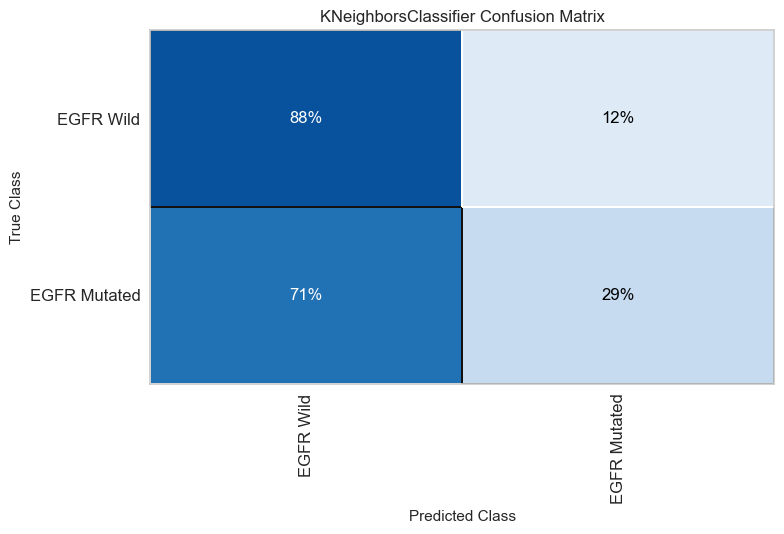

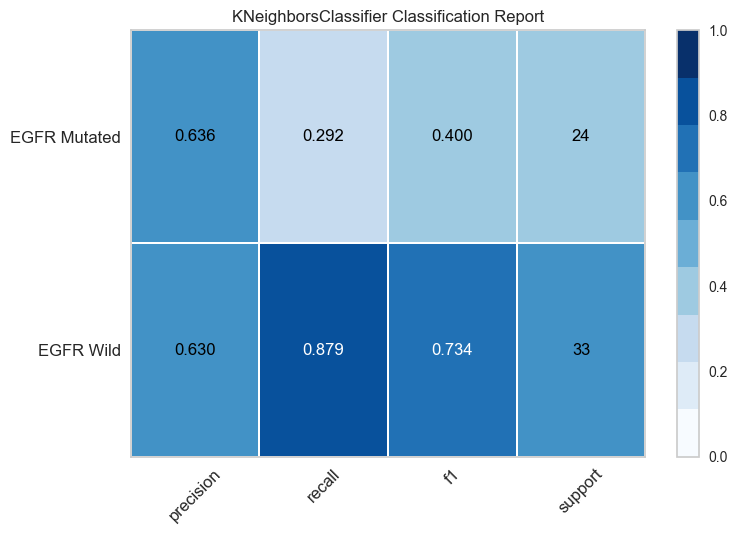

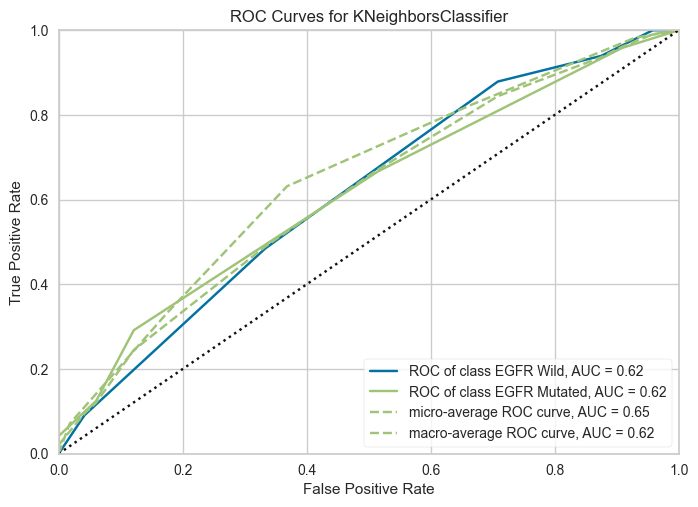

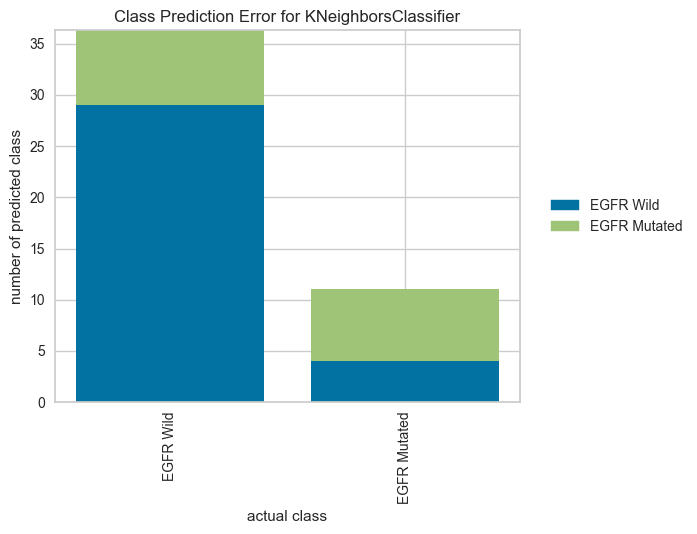

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


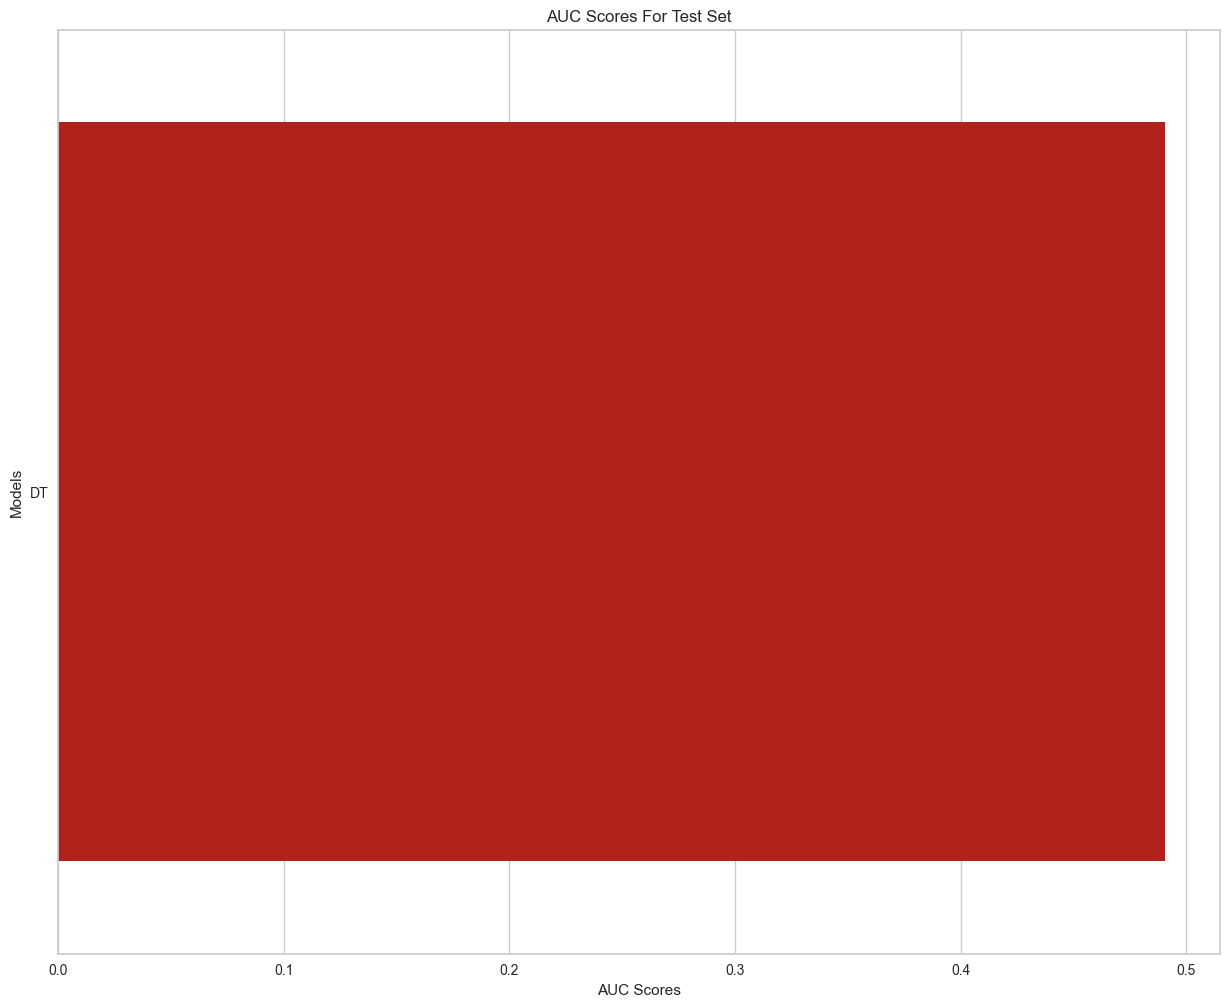

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

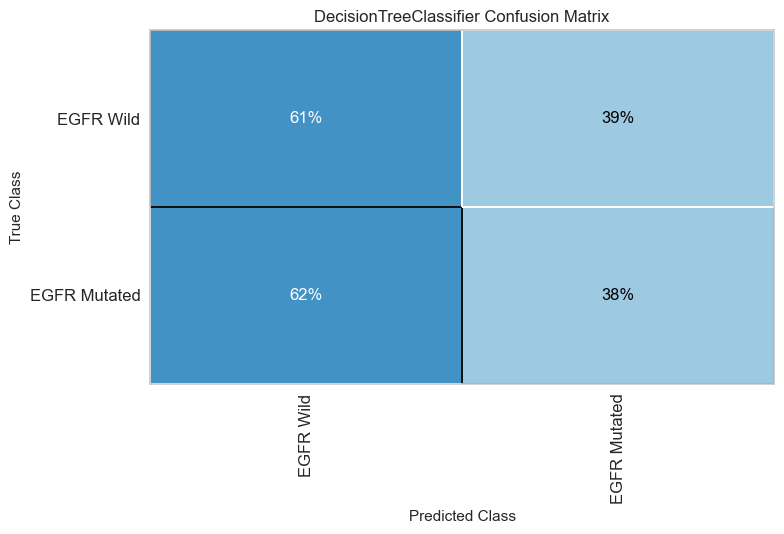

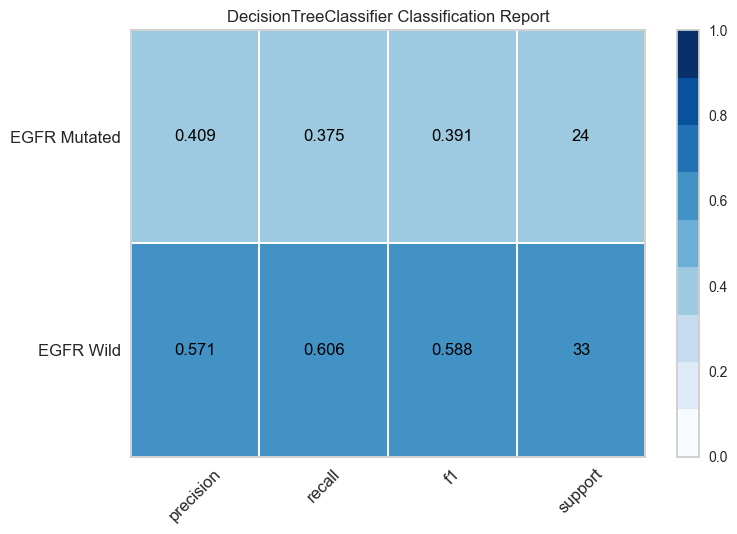

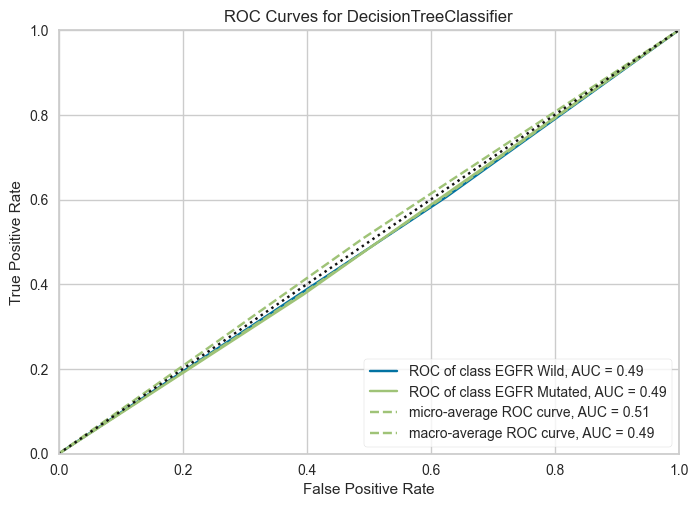

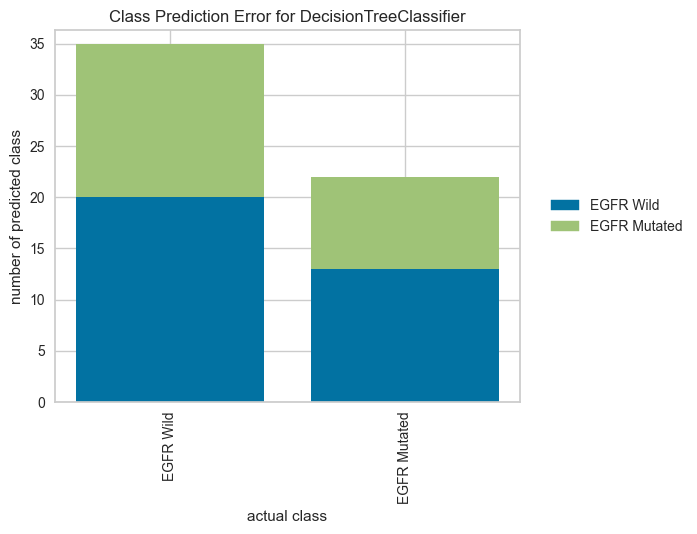

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


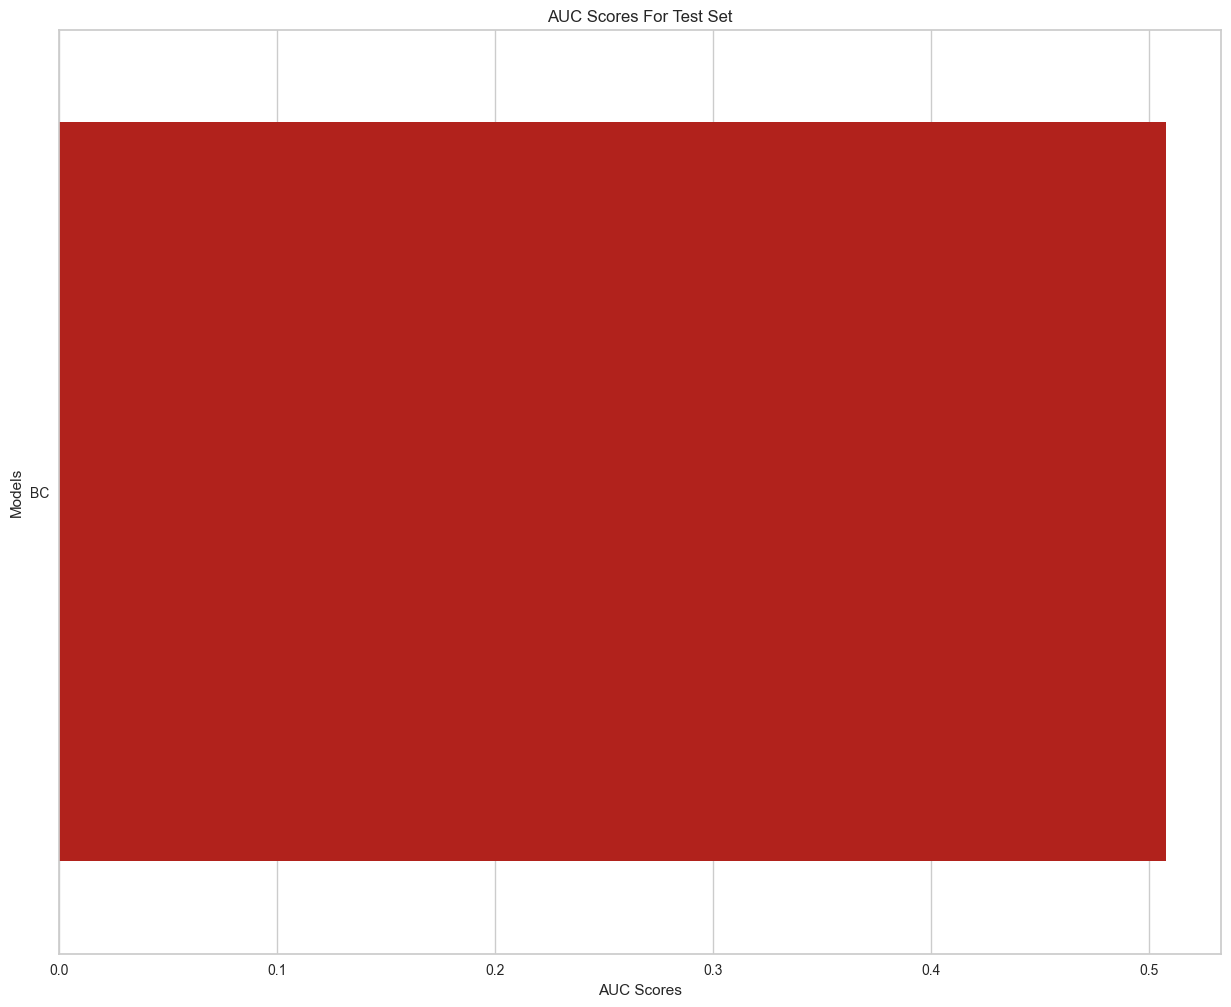

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

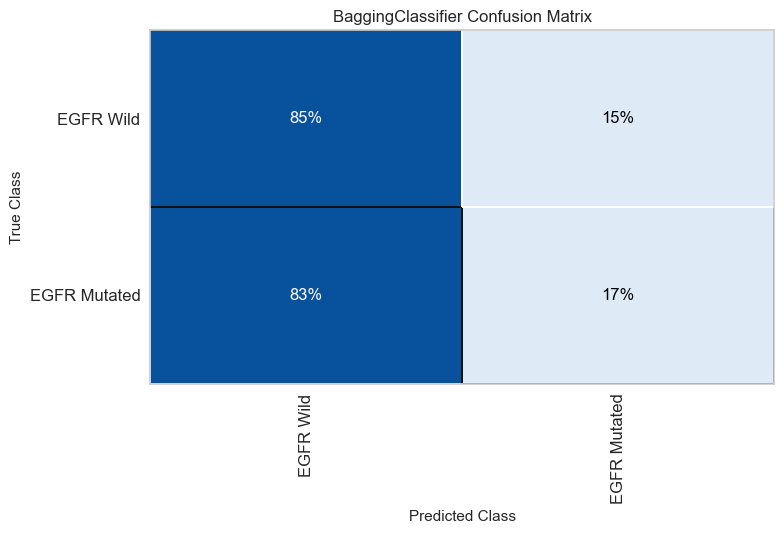

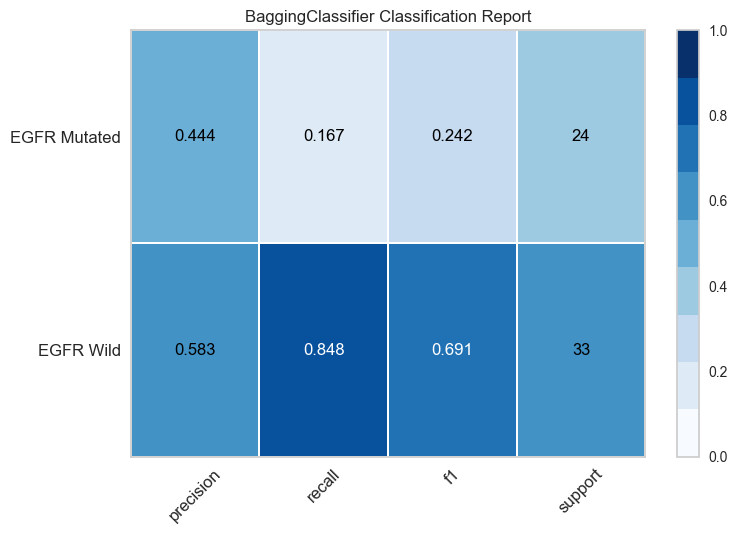

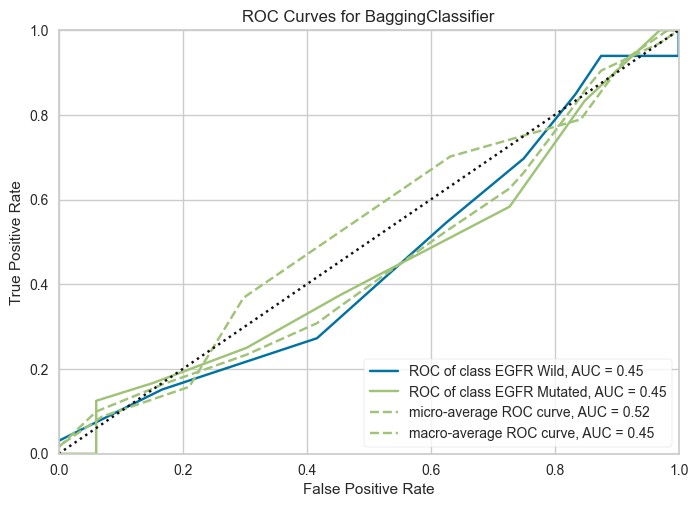

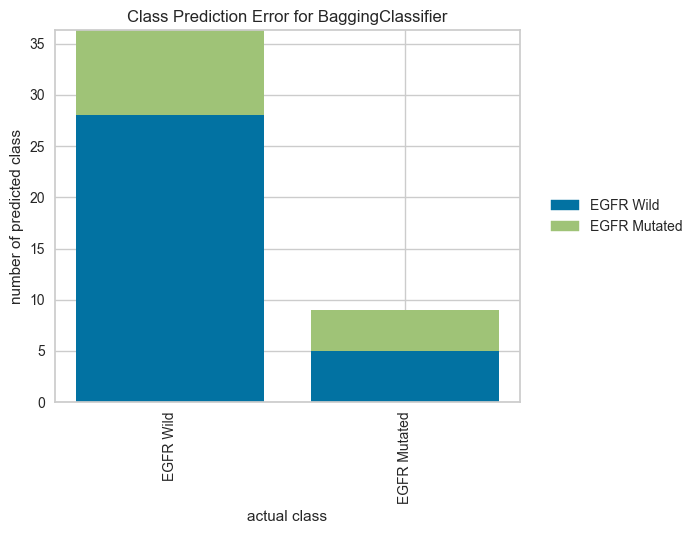

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


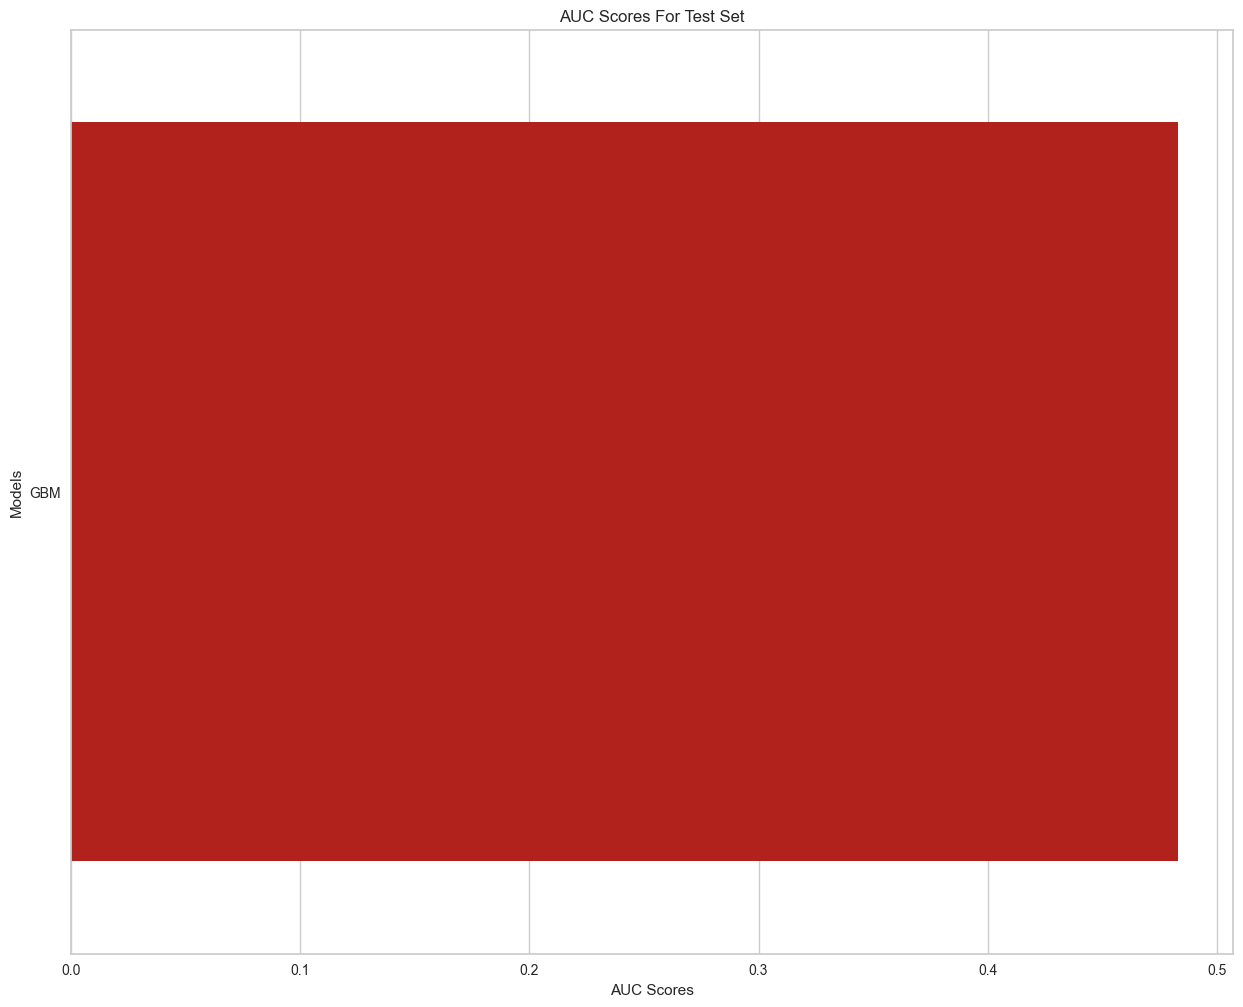

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [32]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 0.001, 'penalty': 'l2'}

In [33]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.5

In [34]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-LR', Save_format = 'csv',Save_type = 'col')

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-LR.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      1.00      0.80        10
    EGFR E21       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.33      0.50      0.40        15
weighted avg       0.44      0.67      0.53        15

precision 0.0 accuracy 0.6666666666666666 recall 0.0 auc 0.5


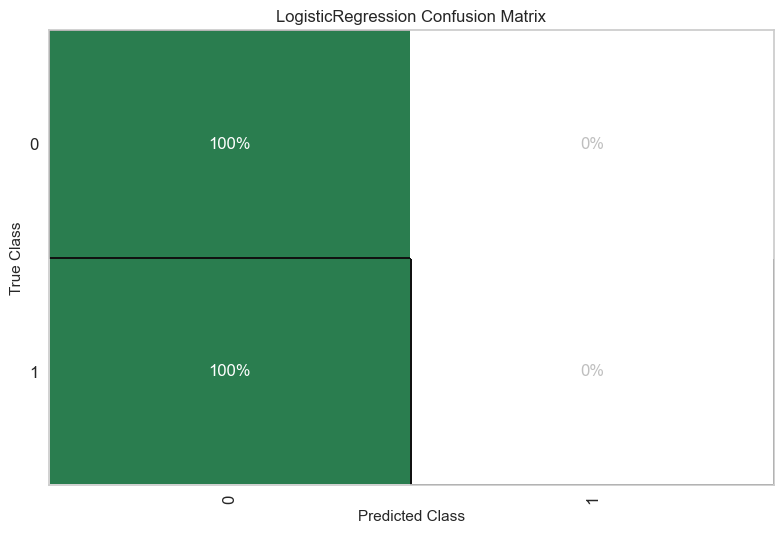

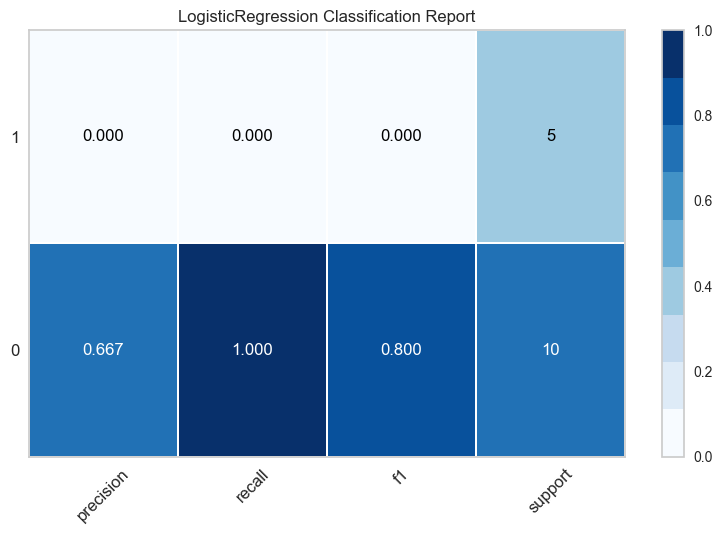

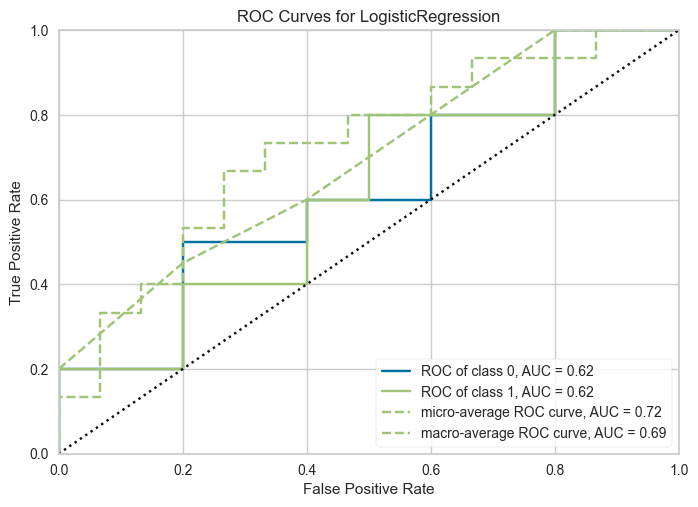

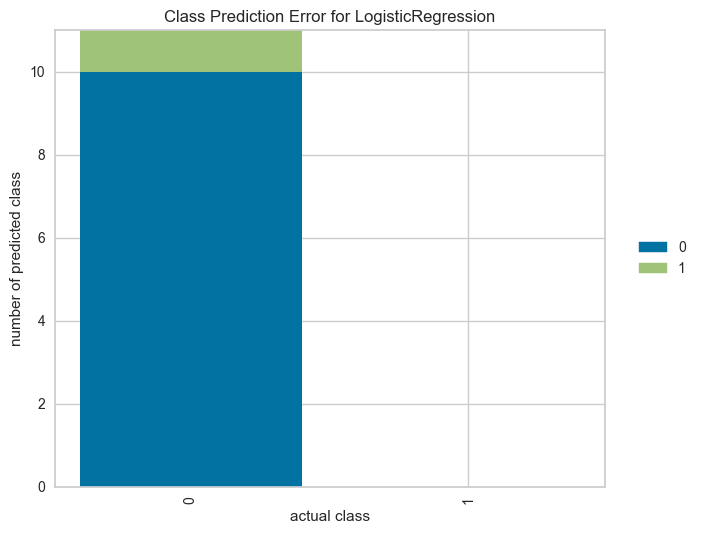

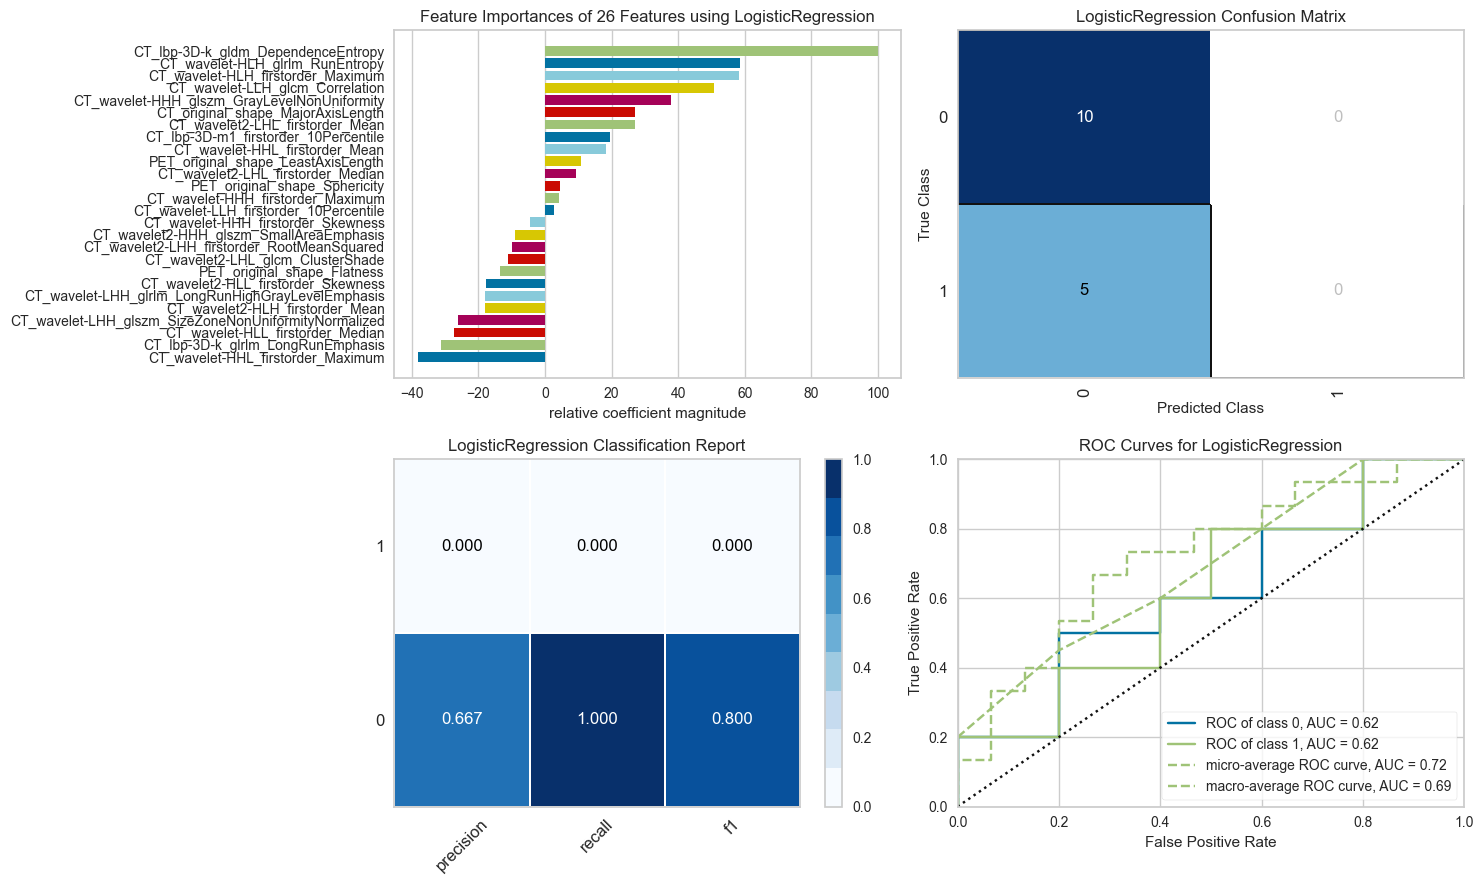

NameError: name 'X' is not defined

In [36]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [37]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': 5, 'min_samples_split': 9, 'n_estimators': 500}

In [38]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': 5, 'min_samples_split': 9, 'n_estimators': 500}

In [39]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.6

In [40]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-RF73', Save_format = 'csv',Save_type = 'col')

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.73      0.80      0.76        10
    EGFR E21       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15

precision 0.5 accuracy 0.6666666666666666 recall 0.4 auc 0.6


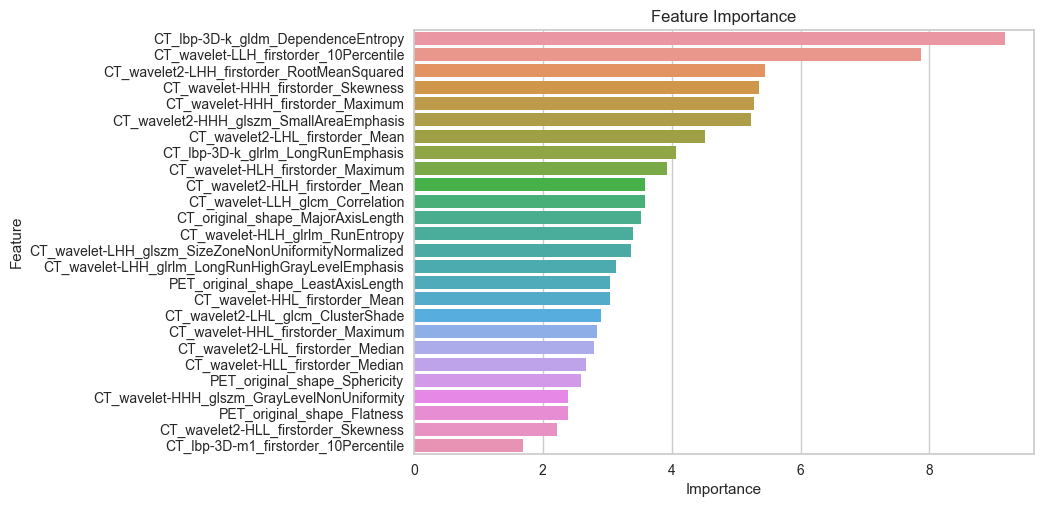

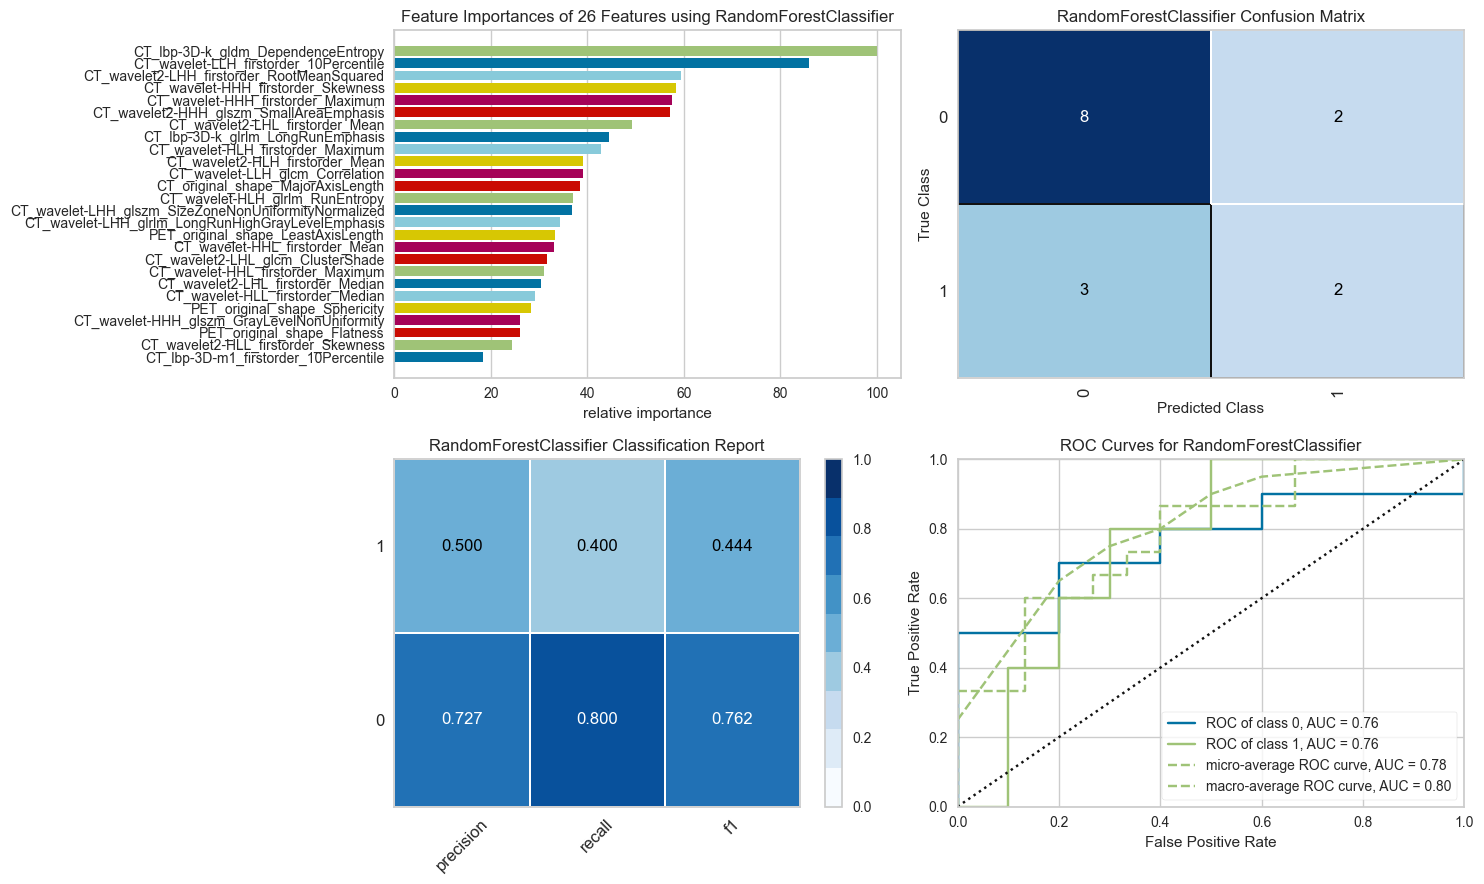

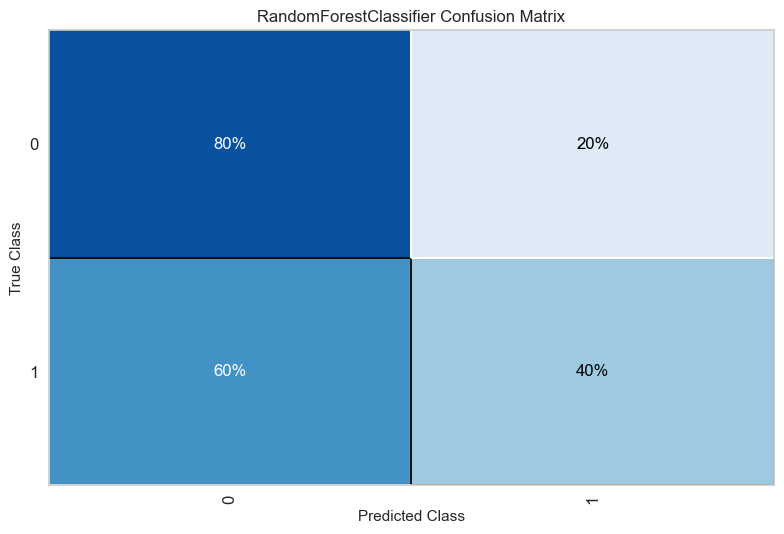

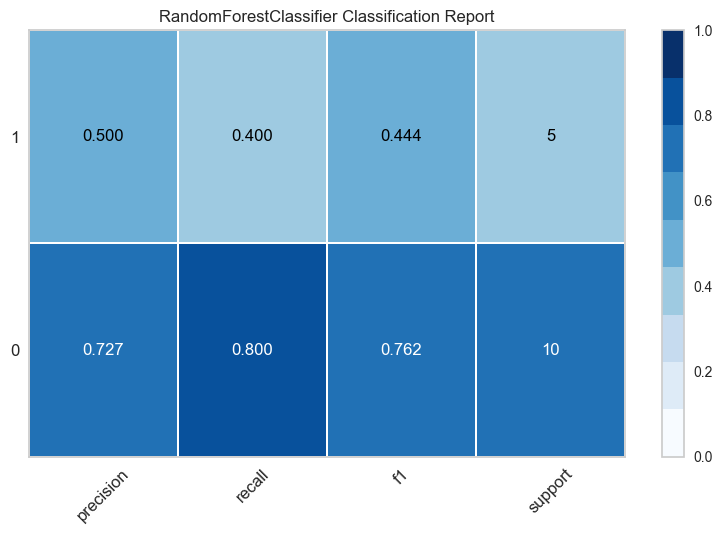

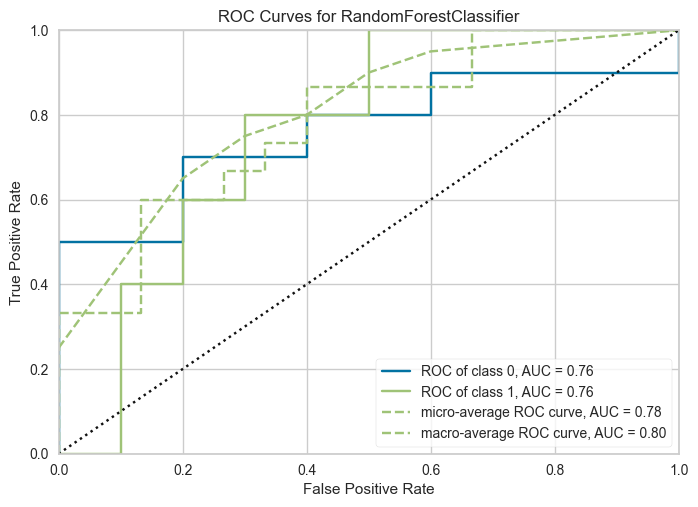

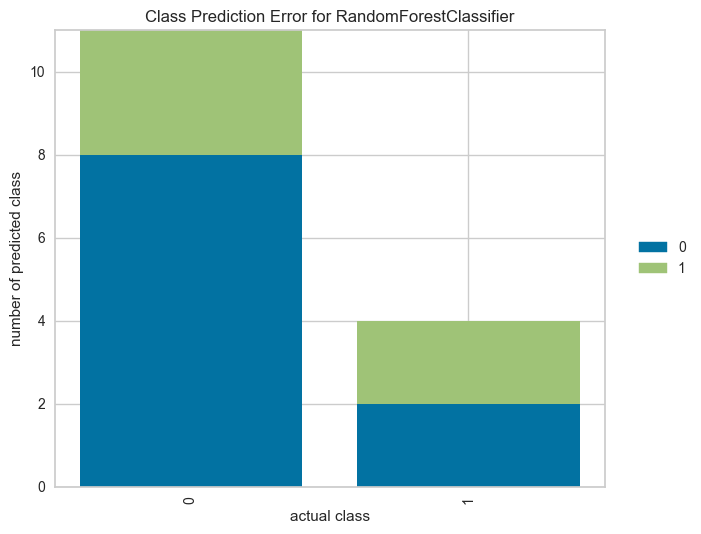

NameError: name 'X' is not defined

In [42]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [95]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000,3000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 588 candidates, totalling 5880 fits
0:	learn: 0.5521905	total: 8.35ms	remaining: 1.66s
1:	learn: 0.4720208	total: 10.6ms	remaining: 1.05s
2:	learn: 0.3915279	total: 12.4ms	remaining: 815ms
3:	learn: 0.3155887	total: 14.2ms	remaining: 697ms
4:	learn: 0.2636297	total: 16.1ms	remaining: 627ms
5:	learn: 0.2332597	total: 17.4ms	remaining: 563ms
6:	learn: 0.2014414	total: 19.4ms	remaining: 534ms
7:	learn: 0.1833687	total: 21.5ms	remaining: 516ms
8:	learn: 0.1549820	total: 24.2ms	remaining: 514ms
9:	learn: 0.1426532	total: 26.3ms	remaining: 500ms
10:	learn: 0.1278241	total: 28.3ms	remaining: 486ms
11:	learn: 0.1153526	total: 30.1ms	remaining: 471ms
12:	learn: 0.1054419	total: 31.8ms	remaining: 457ms
13:	learn: 0.0947347	total: 33.5ms	remaining: 445ms
14:	learn: 0.0872720	total: 35.9ms	remaining: 442ms
15:	learn: 0.0789752	total: 38.2ms	remaining: 440ms
16:	learn: 0.0729792	total: 40.2ms	remaining: 433ms
17:	learn: 0.0636018	total: 41.8ms	remaining: 422ms
18:	learn

174:	learn: 0.0022406	total: 354ms	remaining: 50.5ms
175:	learn: 0.0022306	total: 356ms	remaining: 48.5ms
176:	learn: 0.0022202	total: 358ms	remaining: 46.6ms
177:	learn: 0.0022093	total: 360ms	remaining: 44.5ms
178:	learn: 0.0021936	total: 362ms	remaining: 42.5ms
179:	learn: 0.0021836	total: 364ms	remaining: 40.5ms
180:	learn: 0.0021740	total: 366ms	remaining: 38.4ms
181:	learn: 0.0021645	total: 368ms	remaining: 36.3ms
182:	learn: 0.0021538	total: 370ms	remaining: 34.4ms
183:	learn: 0.0021446	total: 372ms	remaining: 32.4ms
184:	learn: 0.0021311	total: 374ms	remaining: 30.3ms
185:	learn: 0.0021217	total: 376ms	remaining: 28.3ms
186:	learn: 0.0021116	total: 377ms	remaining: 26.2ms
187:	learn: 0.0021028	total: 379ms	remaining: 24.2ms
188:	learn: 0.0020930	total: 381ms	remaining: 22.2ms
189:	learn: 0.0020802	total: 383ms	remaining: 20.1ms
190:	learn: 0.0020711	total: 385ms	remaining: 18.1ms
191:	learn: 0.0020626	total: 387ms	remaining: 16.1ms
192:	learn: 0.0020532	total: 389ms	remaining: 

{'early_stopping_rounds': 2000,
 'iterations': 200,
 'learning_rate': 0.3,
 'max_depth': 6}

In [96]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.5521905	total: 1.4ms	remaining: 278ms
1:	learn: 0.4720208	total: 2.51ms	remaining: 249ms
2:	learn: 0.3915279	total: 3.41ms	remaining: 224ms
3:	learn: 0.3155887	total: 4.19ms	remaining: 205ms
4:	learn: 0.2636297	total: 5.26ms	remaining: 205ms
5:	learn: 0.2332597	total: 6.55ms	remaining: 212ms
6:	learn: 0.2014414	total: 7.46ms	remaining: 206ms
7:	learn: 0.1833687	total: 8.57ms	remaining: 206ms
8:	learn: 0.1549820	total: 9.51ms	remaining: 202ms
9:	learn: 0.1426532	total: 10.3ms	remaining: 196ms
10:	learn: 0.1278241	total: 11.3ms	remaining: 194ms
11:	learn: 0.1153526	total: 12.2ms	remaining: 191ms
12:	learn: 0.1054419	total: 12.9ms	remaining: 186ms
13:	learn: 0.0947347	total: 13.8ms	remaining: 184ms
14:	learn: 0.0872720	total: 14.6ms	remaining: 180ms
15:	learn: 0.0789752	total: 15.4ms	remaining: 177ms
16:	learn: 0.0729792	total: 16.1ms	remaining: 173ms
17:	learn: 0.0636018	total: 17.1ms	remaining: 172ms
18:	learn: 0.0566697	total: 17.9ms	remaining: 171ms
19:	learn: 0.0524798	to

0.3333333333333333

In [97]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [98]:
# shap.dependence_plot(y_train, shap_values, X_train)

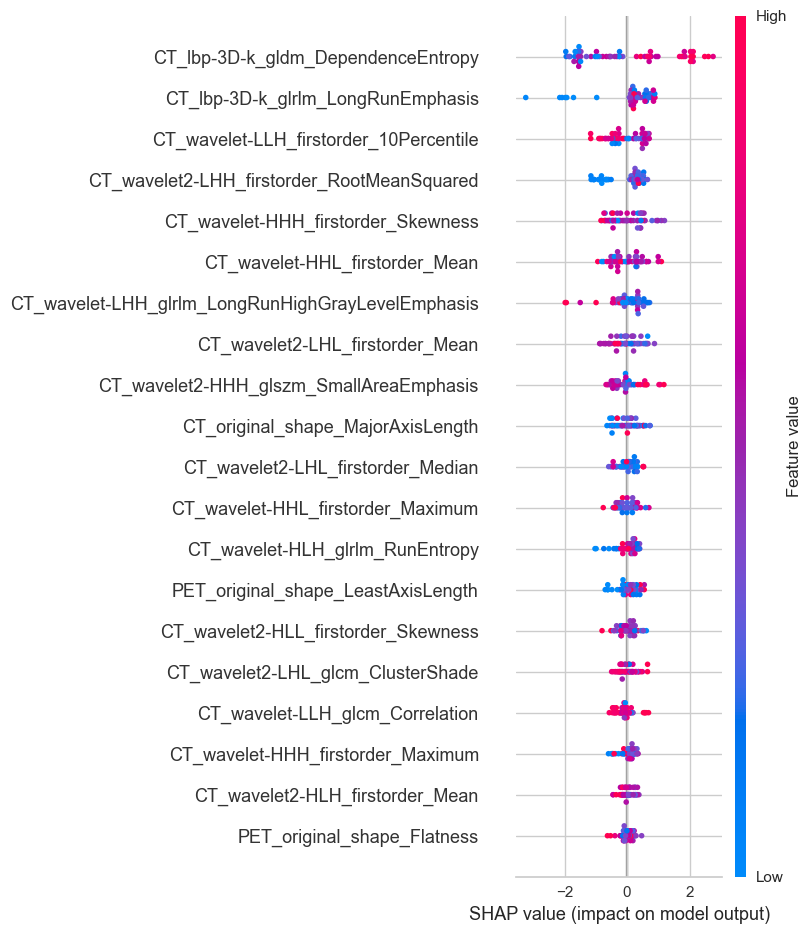

In [99]:

shap.summary_plot(shap_values, X_train)

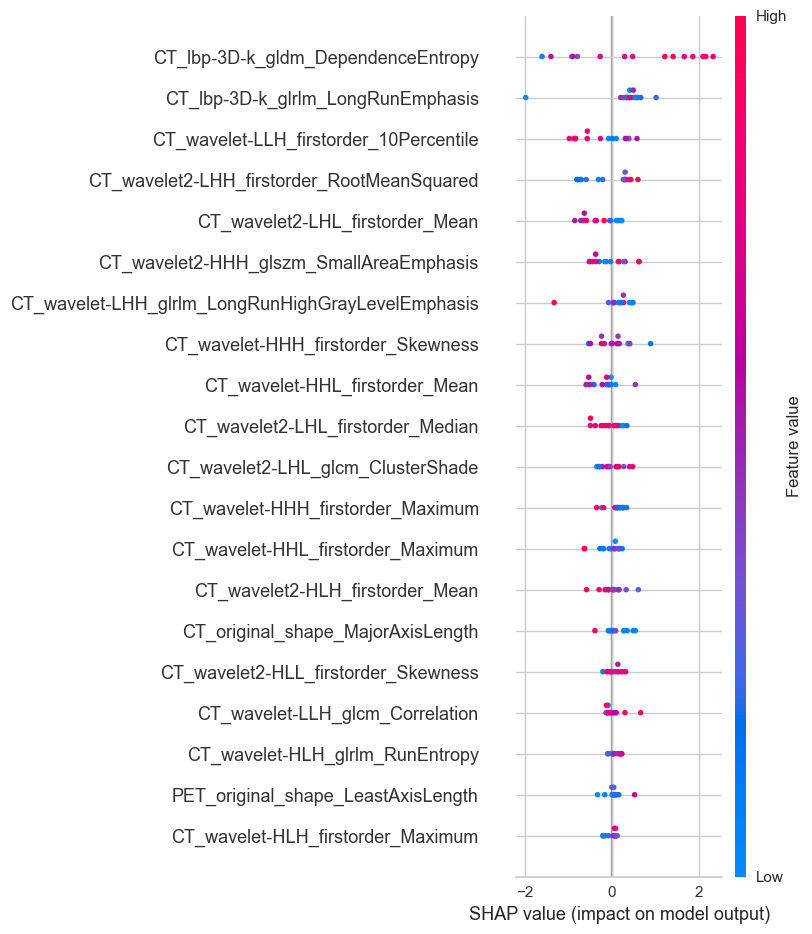

In [100]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [101]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [102]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--LR-CBC73', Save_format = 'csv',Save_type = 'col')

In [103]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--LR-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.40      0.44        10
    EGFR E21       0.14      0.20      0.17         5

    accuracy                           0.33        15
   macro avg       0.32      0.30      0.31        15
weighted avg       0.38      0.33      0.35        15

precision 0.14285714285714285 accuracy 0.3333333333333333 recall 0.2 auc 0.3


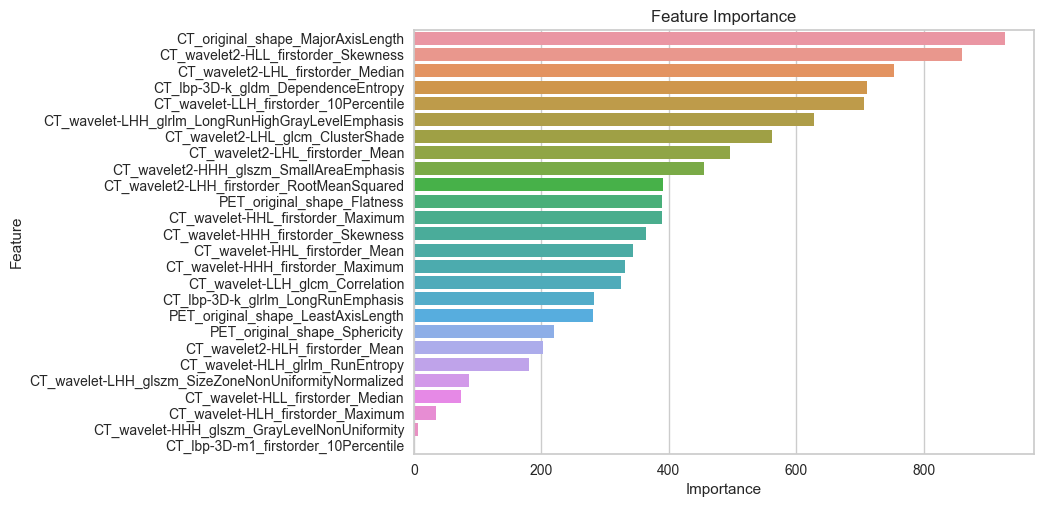

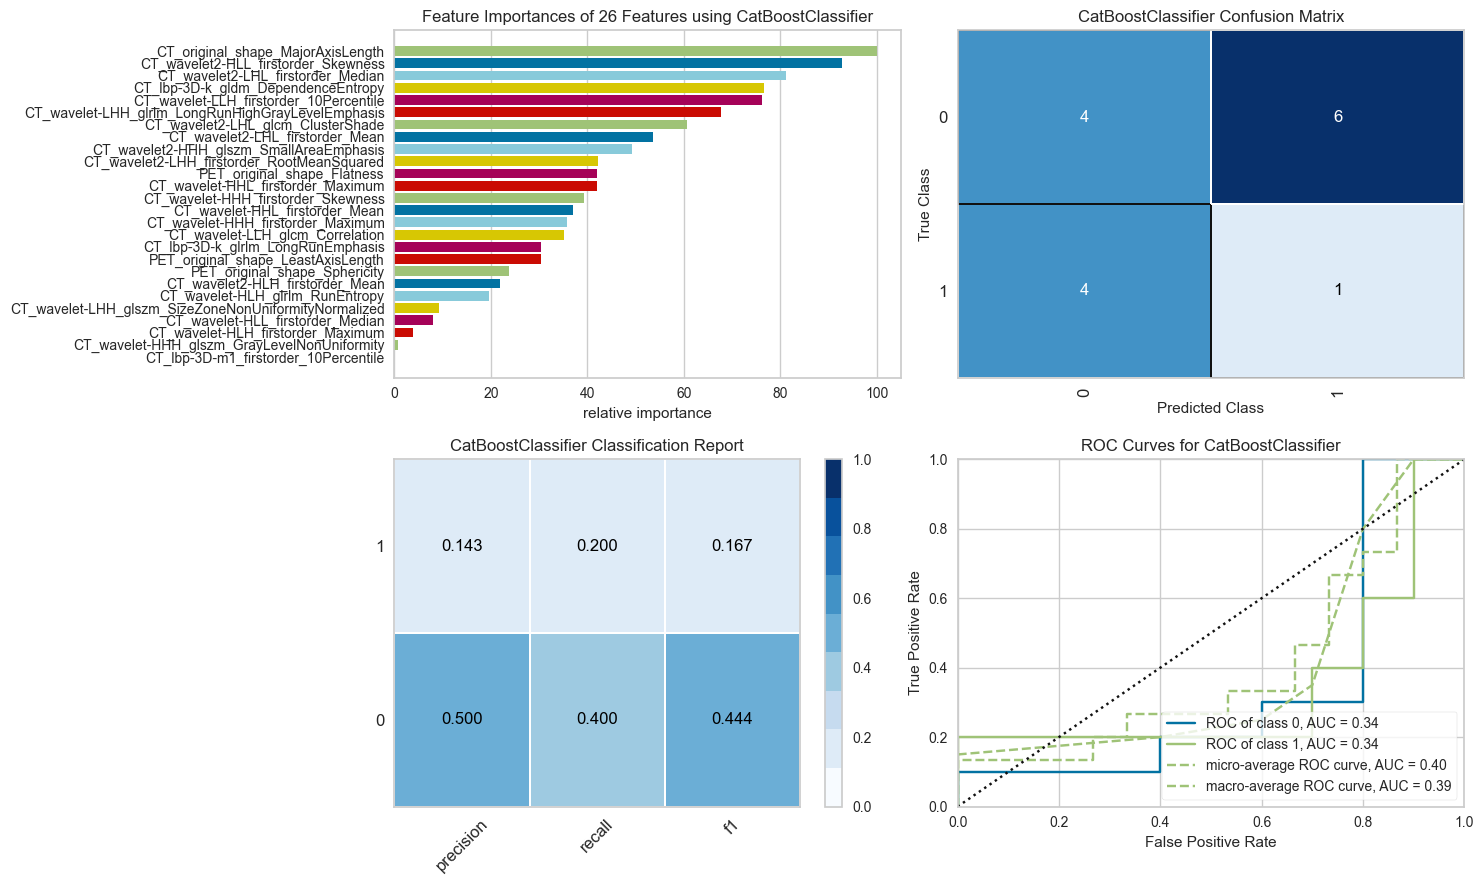

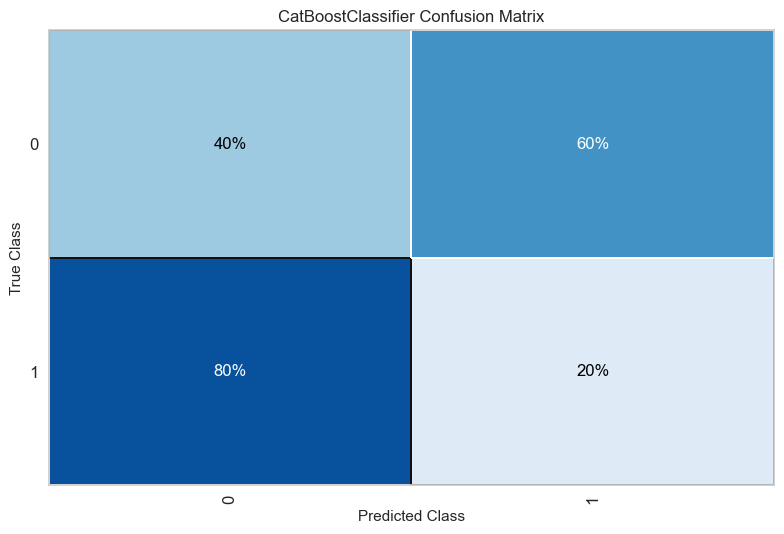

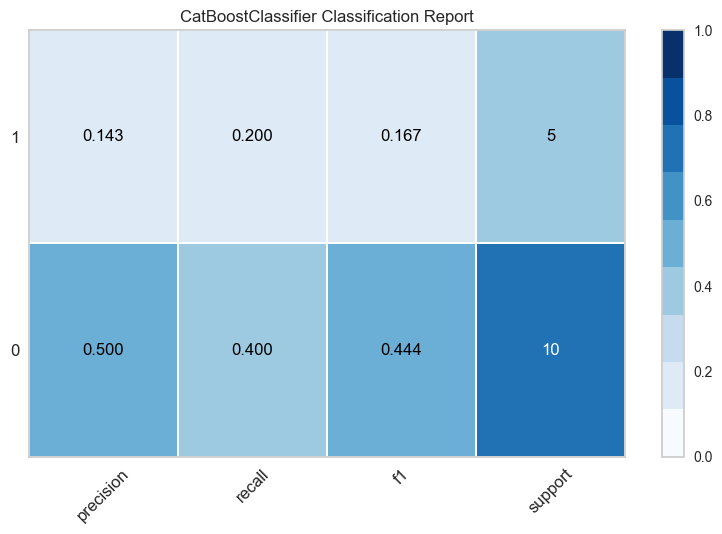

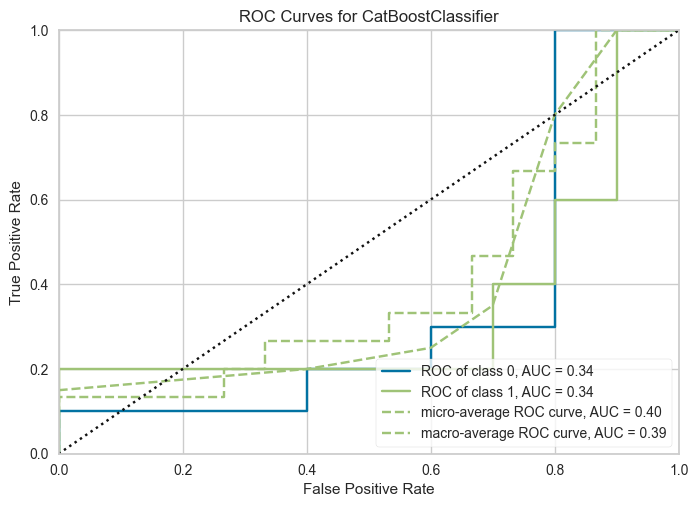

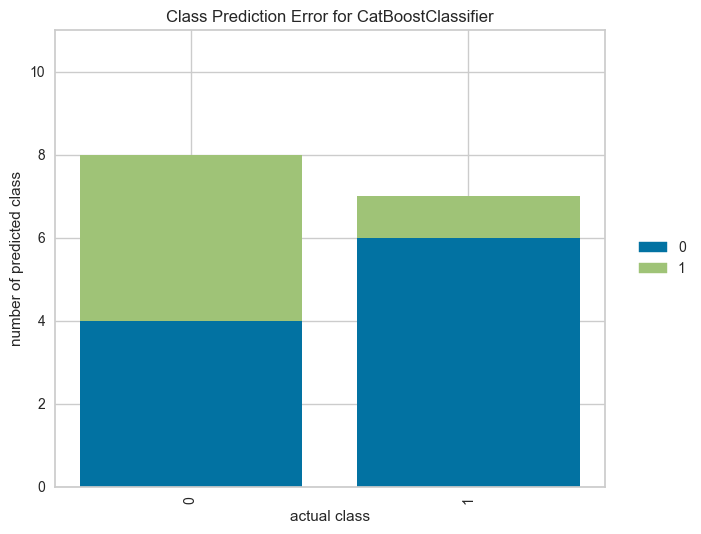

NameError: name 'X' is not defined

In [104]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [43]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.5, 'n_estimators': 2000}

In [44]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.4

In [45]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--LR-ADB73', Save_format = 'csv',Save_type = 'col')

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--LR-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.60      0.30      0.40        10
    EGFR E21       0.30      0.60      0.40         5

    accuracy                           0.40        15
   macro avg       0.45      0.45      0.40        15
weighted avg       0.50      0.40      0.40        15

precision 0.3 accuracy 0.4 recall 0.6 auc 0.45000000000000007


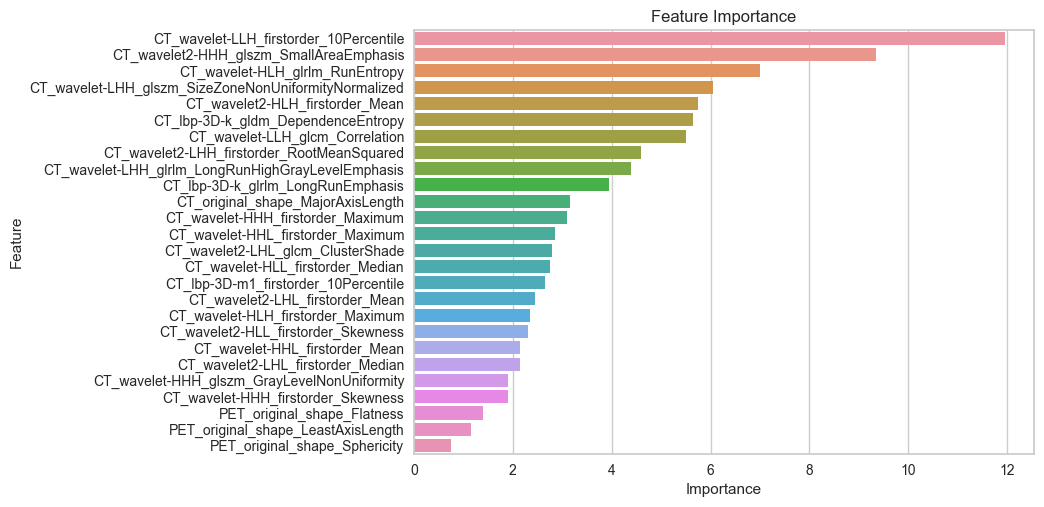

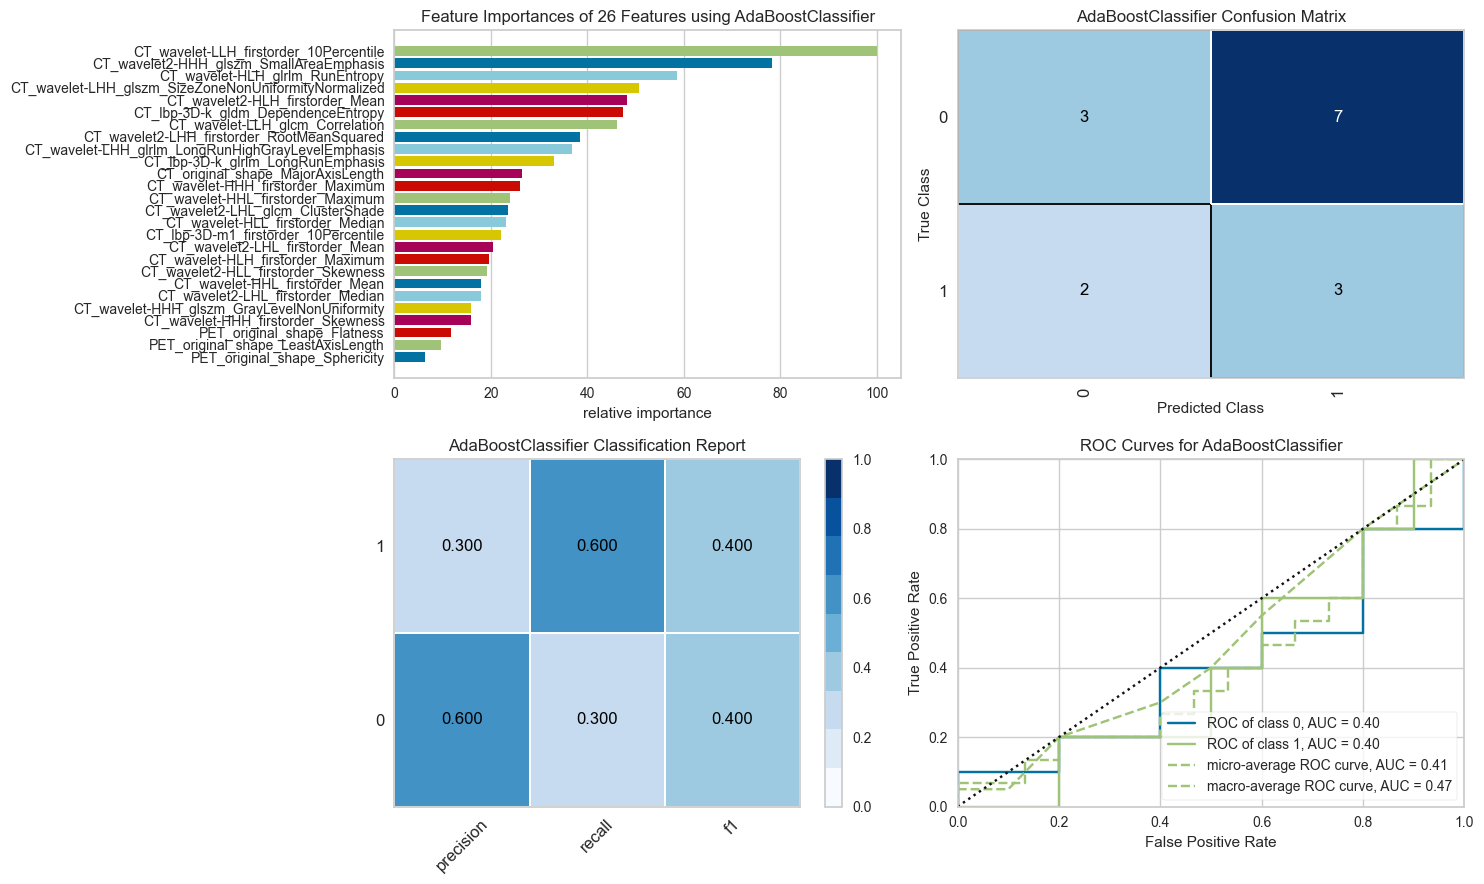

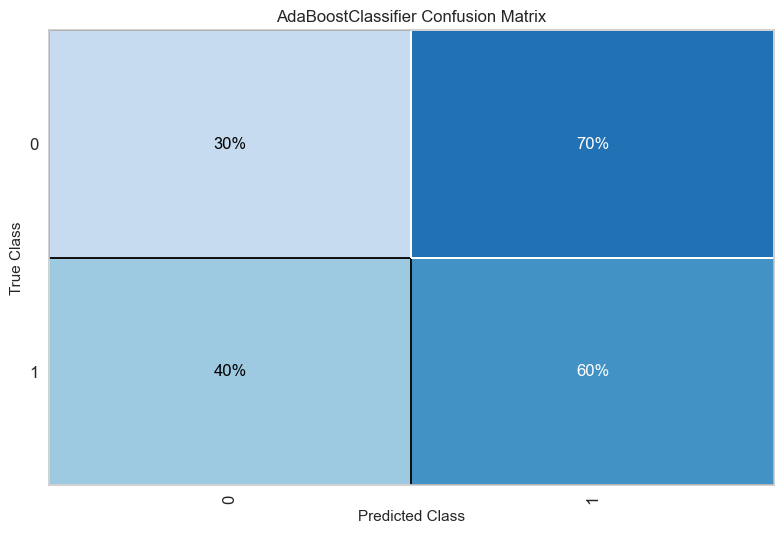

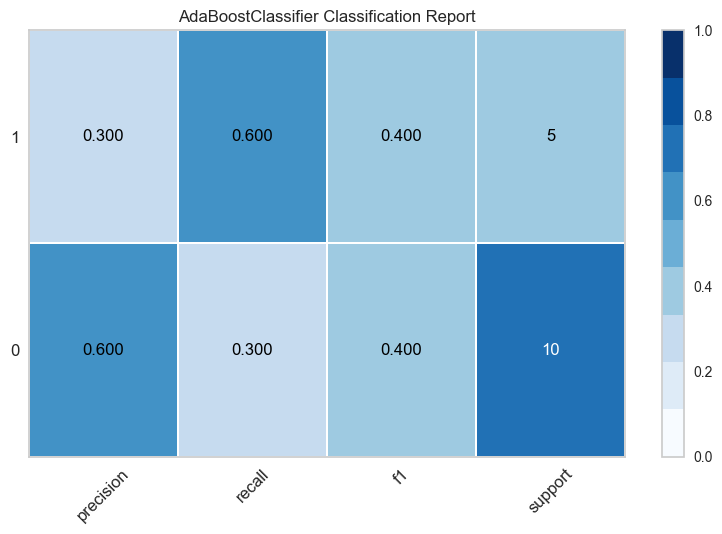

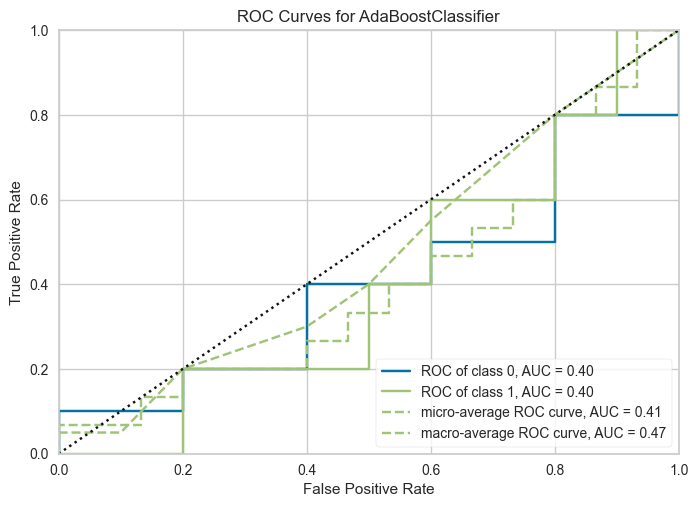

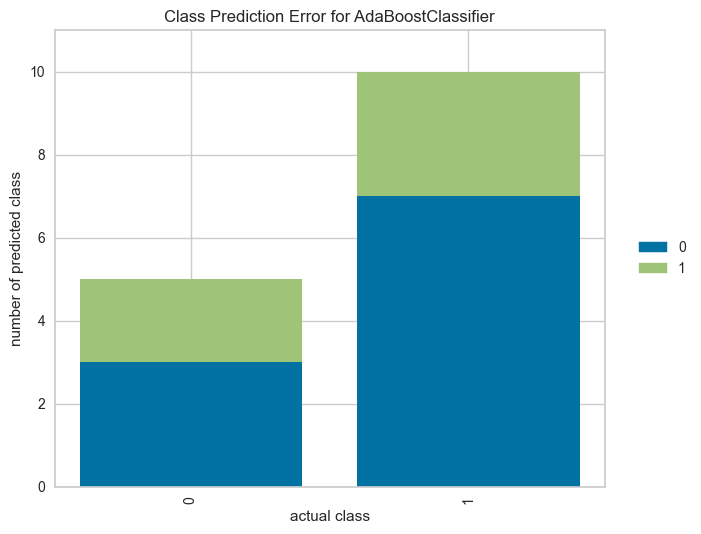

NameError: name 'X' is not defined

In [47]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [48]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.1, 'n_estimators': 5000, 'subsample': 0.7}

In [49]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.4

In [50]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--LR-gbdt', Save_format = 'csv',Save_type = 'col')

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--LR-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.56      0.50      0.53        10
    EGFR E21       0.17      0.20      0.18         5

    accuracy                           0.40        15
   macro avg       0.36      0.35      0.35        15
weighted avg       0.43      0.40      0.41        15

precision 0.16666666666666666 accuracy 0.4 recall 0.2 auc 0.35


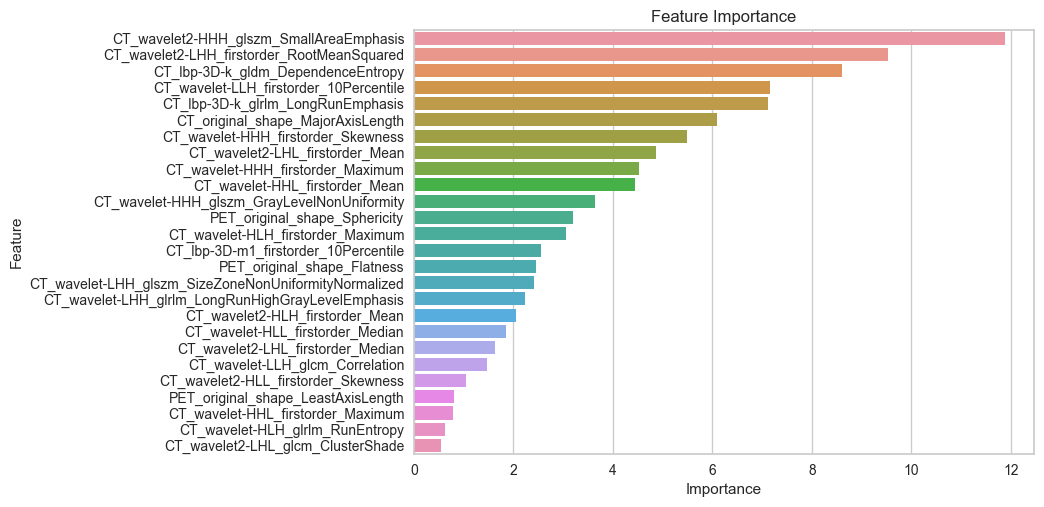

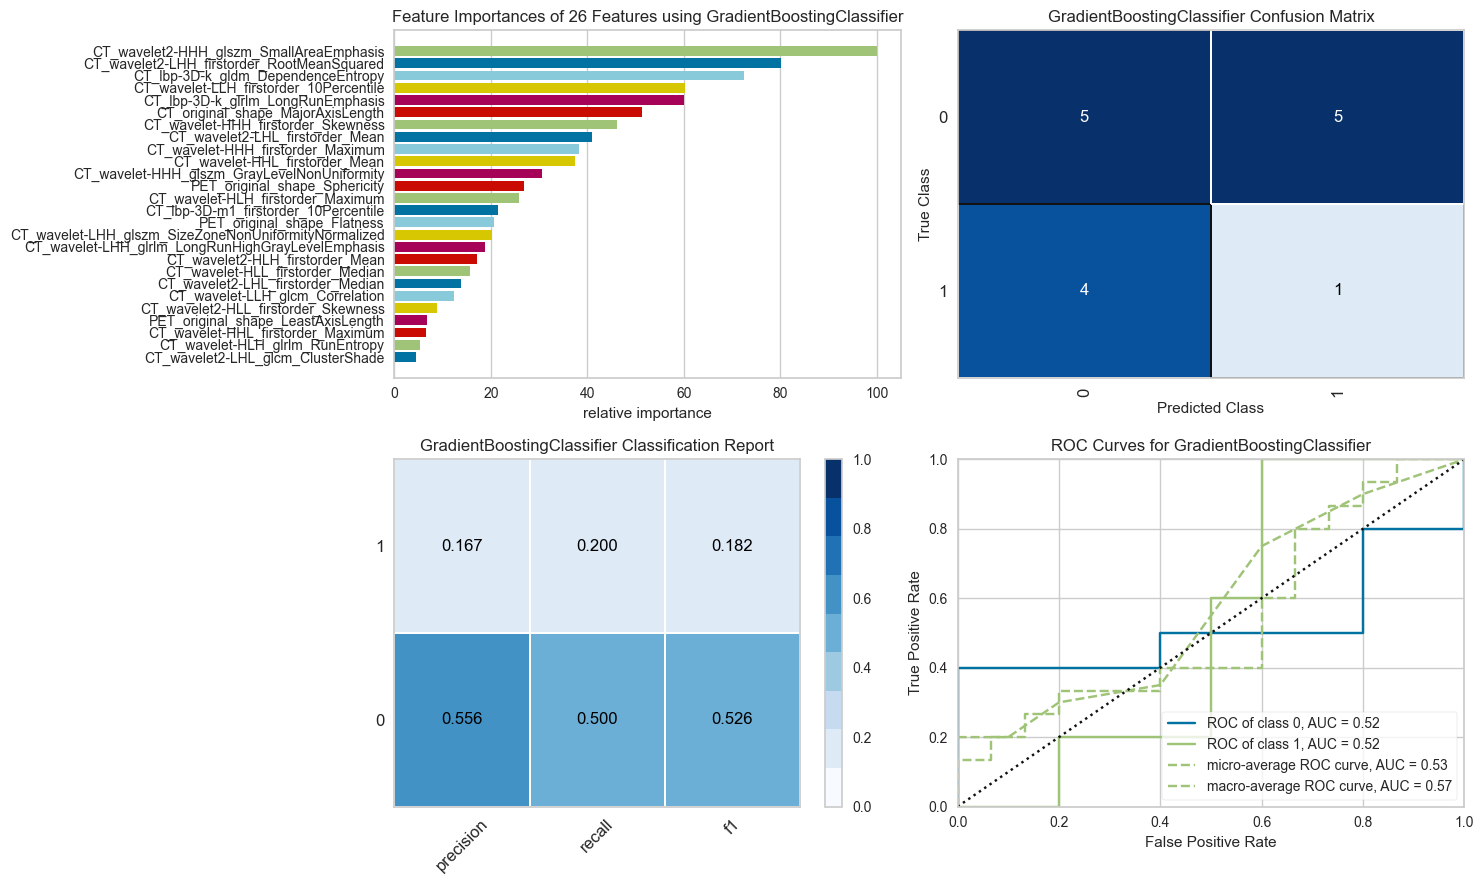

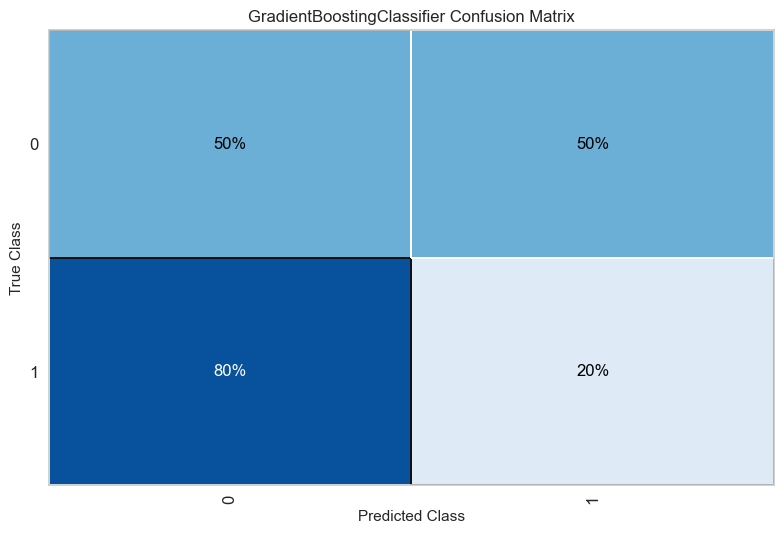

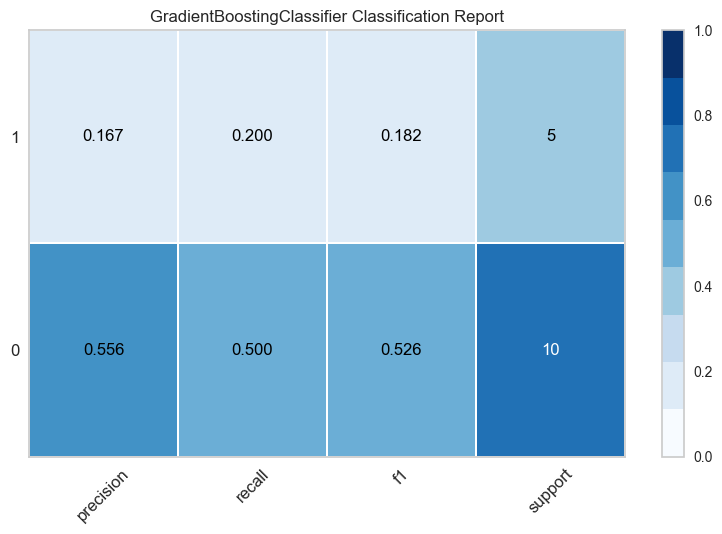

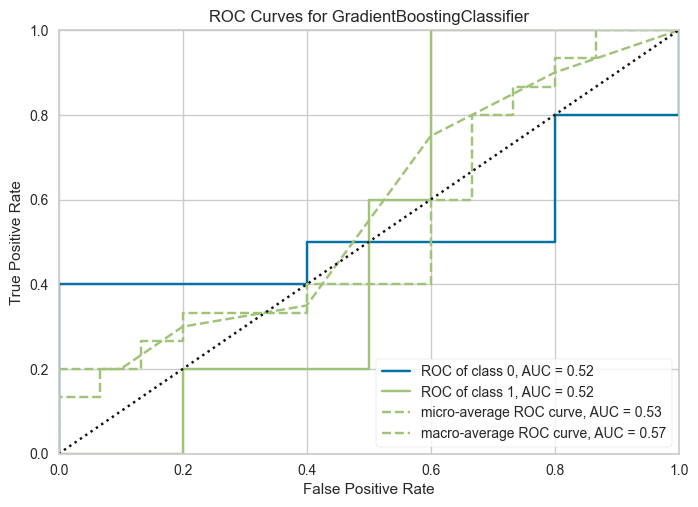

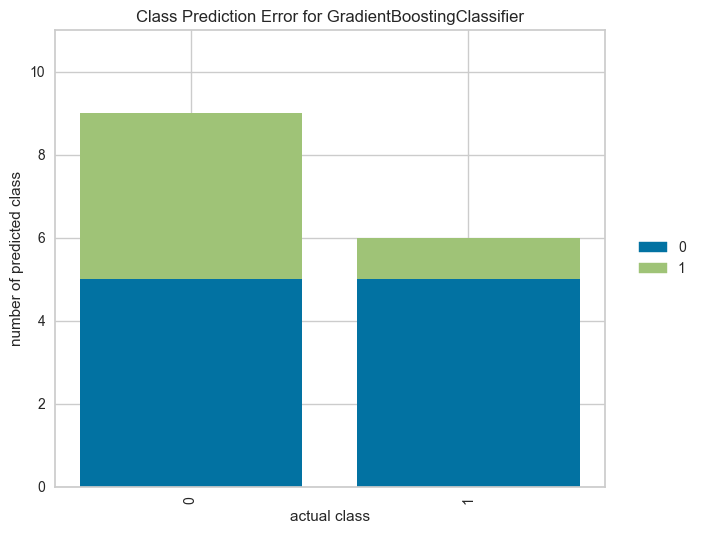

NameError: name 'X' is not defined

In [52]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [53]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 1.0}

In [54]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5333333333333333

In [55]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-XGB73', Save_format = 'csv',Save_type = 'col')

In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.71      0.50      0.59        10
    EGFR E21       0.38      0.60      0.46         5

    accuracy                           0.53        15
   macro avg       0.54      0.55      0.52        15
weighted avg       0.60      0.53      0.55        15

precision 0.375 accuracy 0.5333333333333333 recall 0.6 auc 0.55


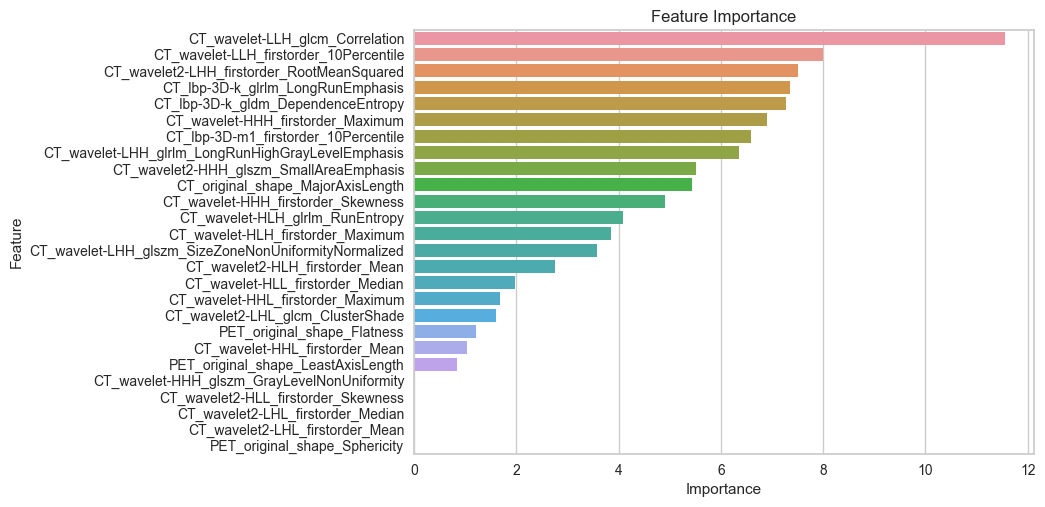

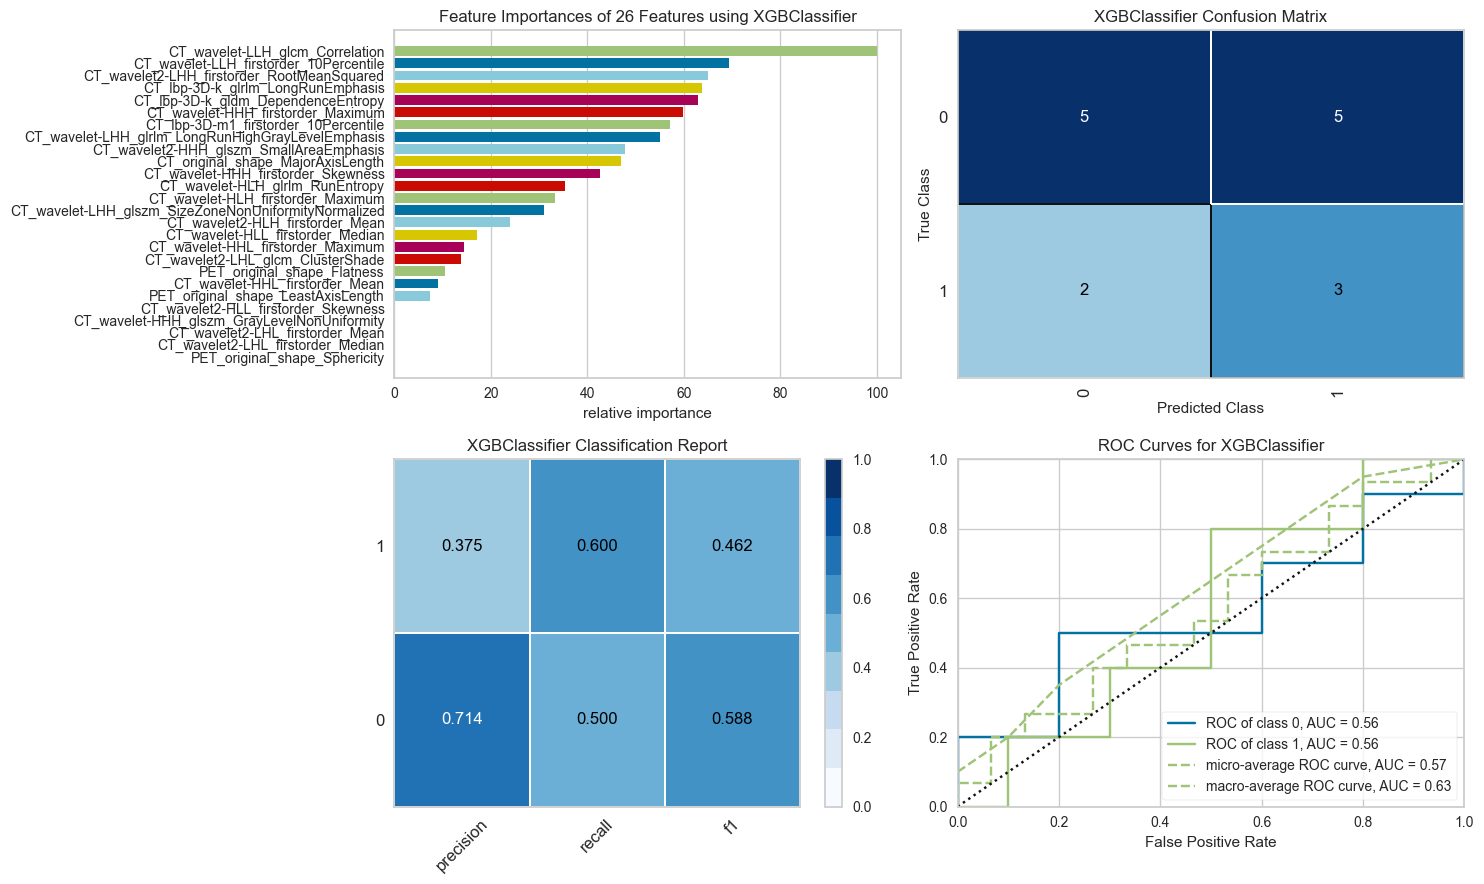

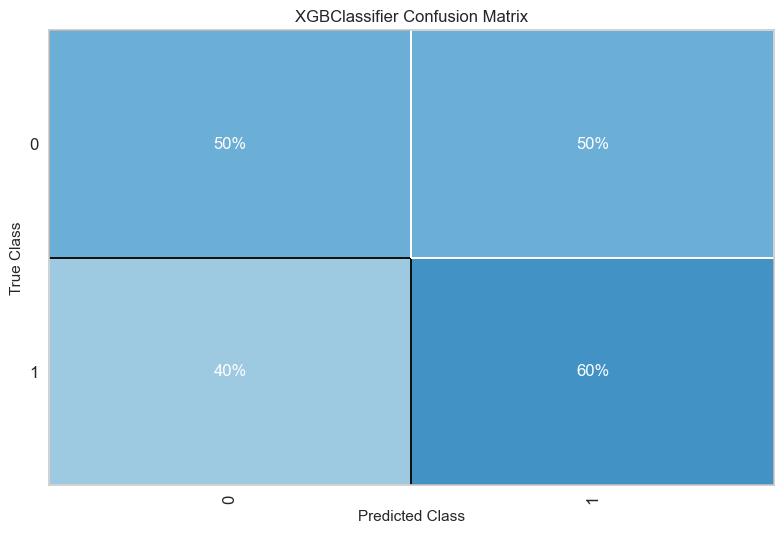

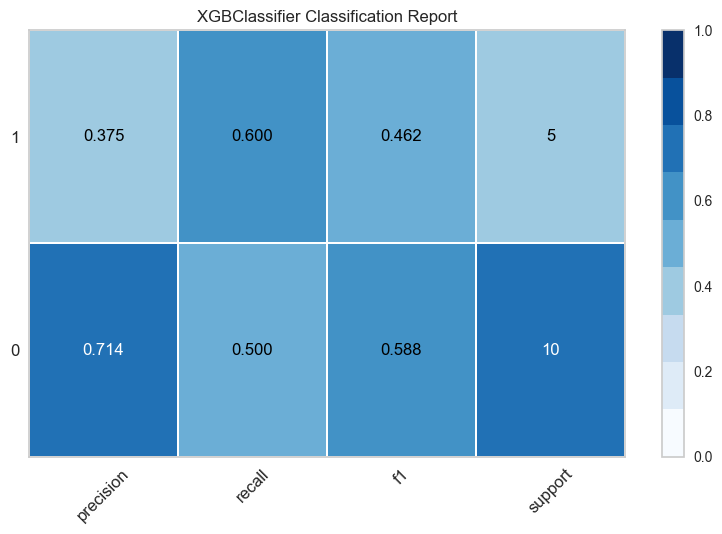

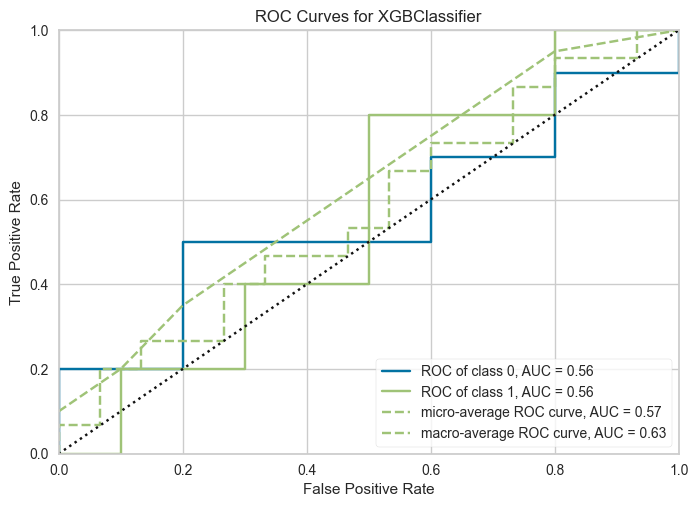

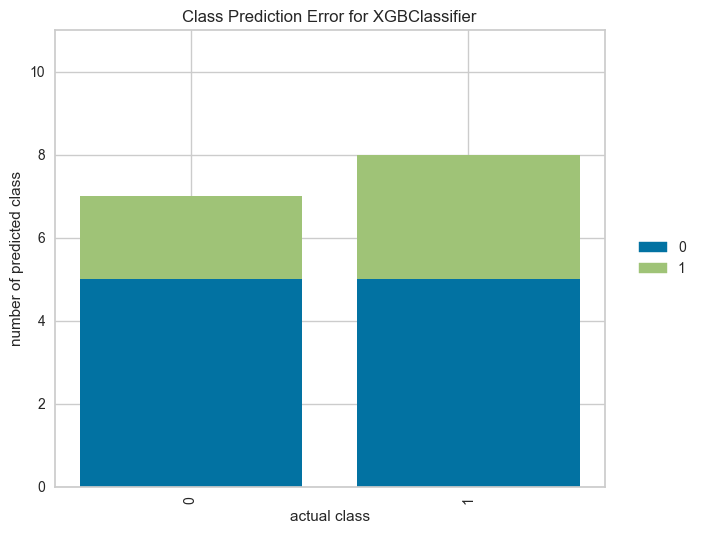

In [57]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [58]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 2000}

In [59]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6

In [60]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-lgb73', Save_format = 'csv',Save_type = 'col')

In [61]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.60      0.67        10
    EGFR E21       0.43      0.60      0.50         5

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15

precision 0.42857142857142855 accuracy 0.6 recall 0.6 auc 0.6


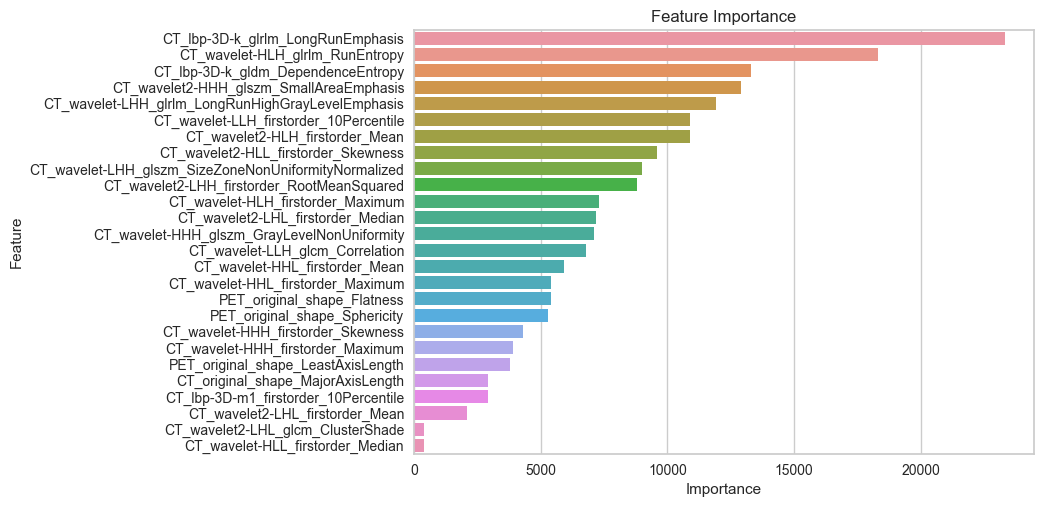

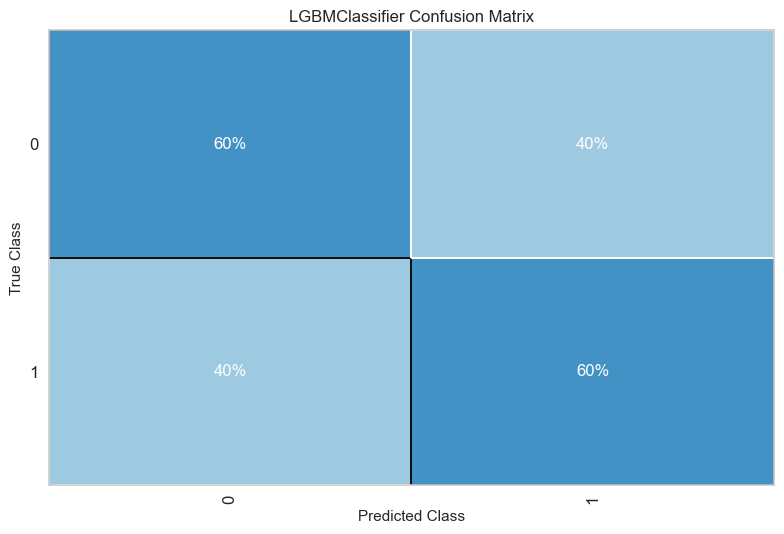

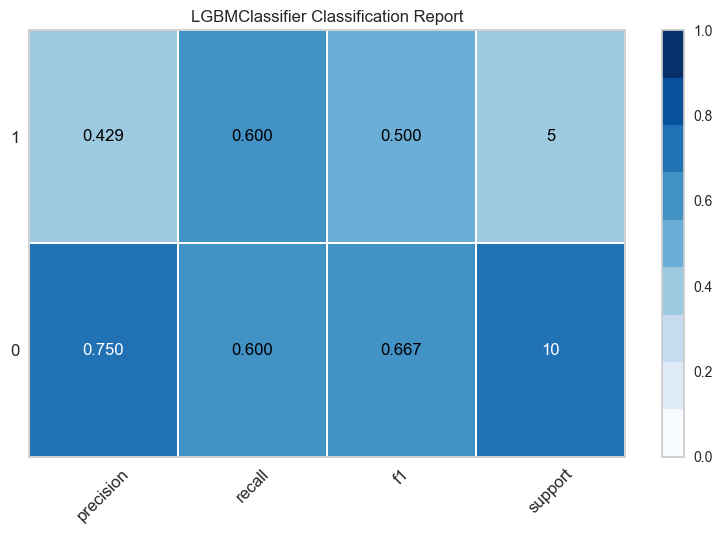

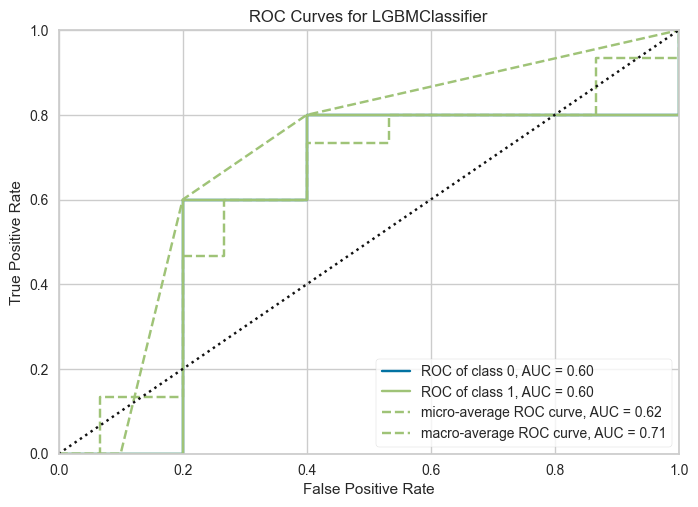

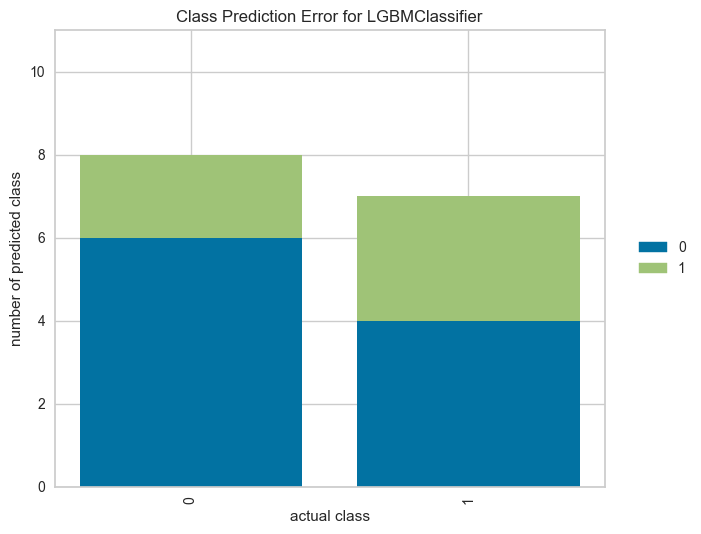

In [62]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [63]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [64]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [65]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

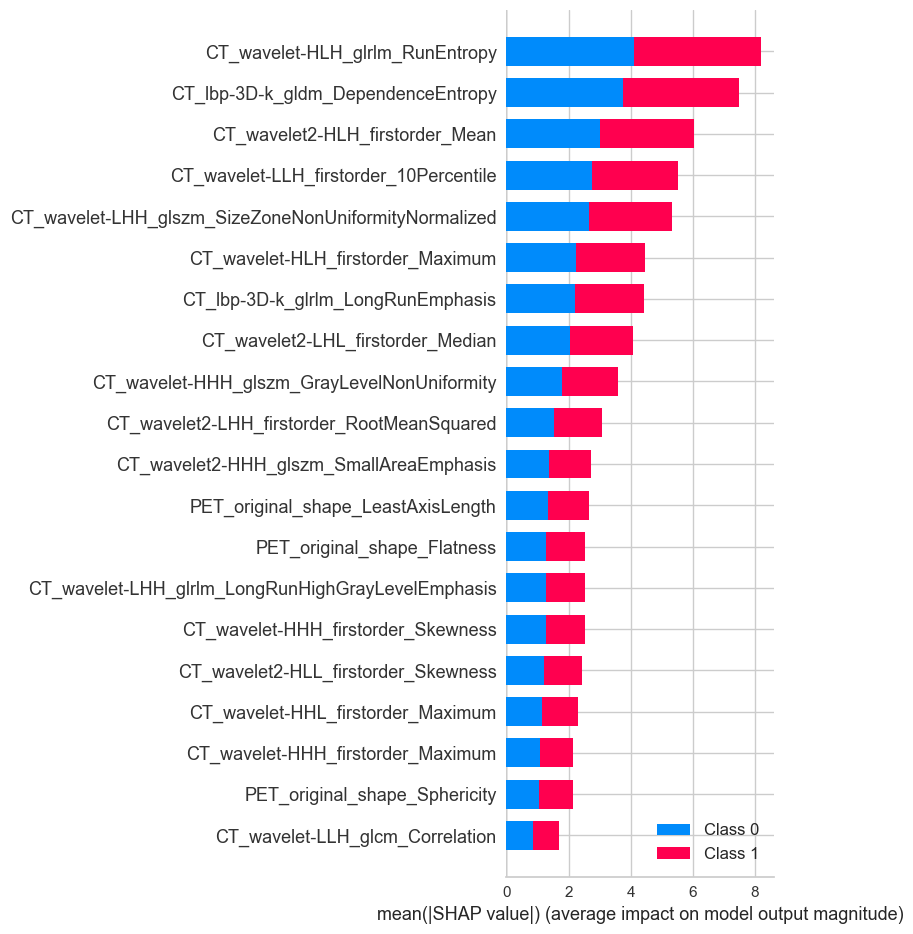

In [66]:
shap.summary_plot(shap_values, X_train)

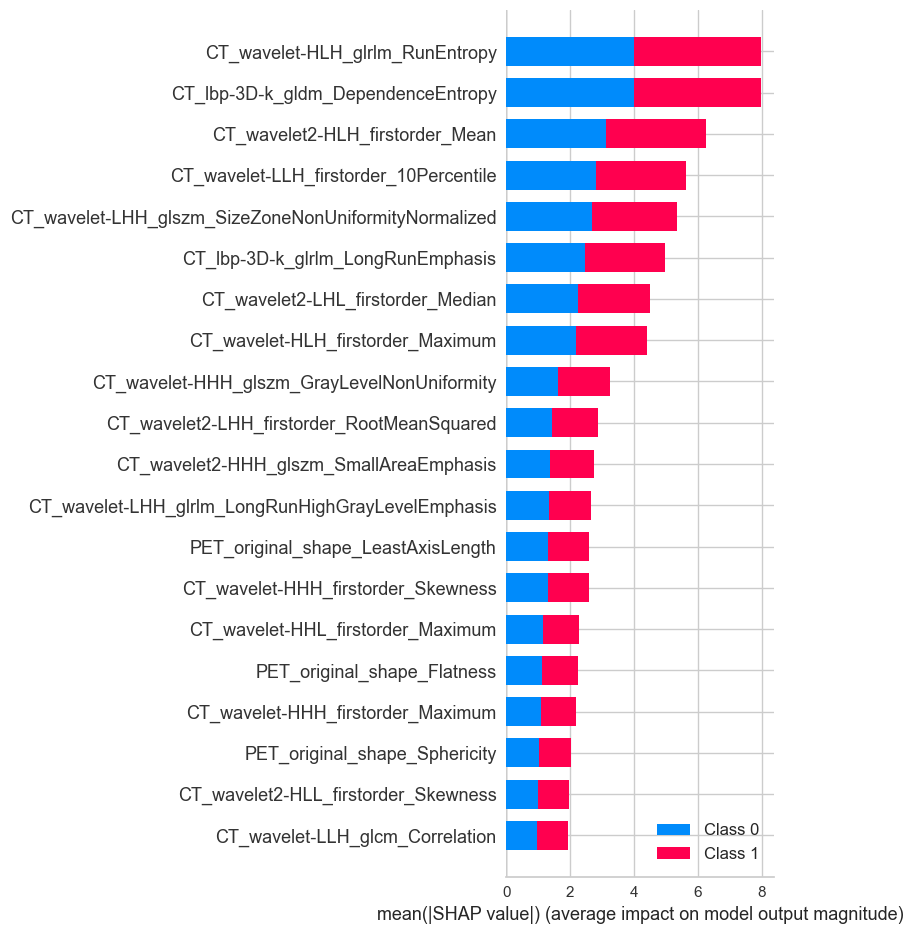

In [67]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [68]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [69]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.500000
0:	learn: 0.5521905	total: 1.3ms	remaining: 259ms
1:	learn: 0.4720208	total: 2.32ms	remaining: 230ms
2:	learn: 0.3915279	total: 3.31ms	remaining: 218ms
3:	learn: 0.3155887	total: 4.25ms	remaining: 208ms
4:	learn: 0.2636297	total: 5.24ms	remaining: 204ms
5:	learn: 0.2332597	total: 6.04ms	remaining: 195ms
6:	learn: 0.2014414	total: 6.82ms	remaining: 188ms
7:	learn: 0.1833687	total: 7.56ms	remaining: 181ms
8:	learn: 0.1549820	total: 8.3ms	remaining: 176ms
9:	learn: 0.1426532	total: 9.05ms	remaining: 172ms
10:	learn: 0.1278241	total: 9.88ms	remaining: 170ms
11:	learn: 0.1153526	total: 10.7ms	remaining: 168ms
12:	learn: 0.1054419	total: 11.5ms	remaining: 166ms
13:	learn: 0.0947347	total: 12.3ms	remaining: 163ms
14:	learn: 0.0872720	total: 13.1ms	remaining: 161ms
15:	learn: 0.0789752	total: 13.9ms	remaining: 160ms
16:	learn: 0.0729792	total: 14.8ms	remaining: 159ms
17:	learn: 0.063601

188:	learn: 0.0020930	total: 144ms	remaining: 8.39ms
189:	learn: 0.0020802	total: 145ms	remaining: 7.64ms
190:	learn: 0.0020711	total: 146ms	remaining: 6.89ms
191:	learn: 0.0020626	total: 147ms	remaining: 6.12ms
192:	learn: 0.0020532	total: 148ms	remaining: 5.36ms
193:	learn: 0.0020445	total: 148ms	remaining: 4.59ms
194:	learn: 0.0020328	total: 149ms	remaining: 3.82ms
195:	learn: 0.0020242	total: 150ms	remaining: 3.06ms
196:	learn: 0.0020152	total: 151ms	remaining: 2.29ms
197:	learn: 0.0020069	total: 151ms	remaining: 1.53ms
198:	learn: 0.0019979	total: 152ms	remaining: 764us
199:	learn: 0.0019863	total: 153ms	remaining: 0us
CatBoost: 0.300000

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.500          0.500
1            CatBoost           1.000          0.300


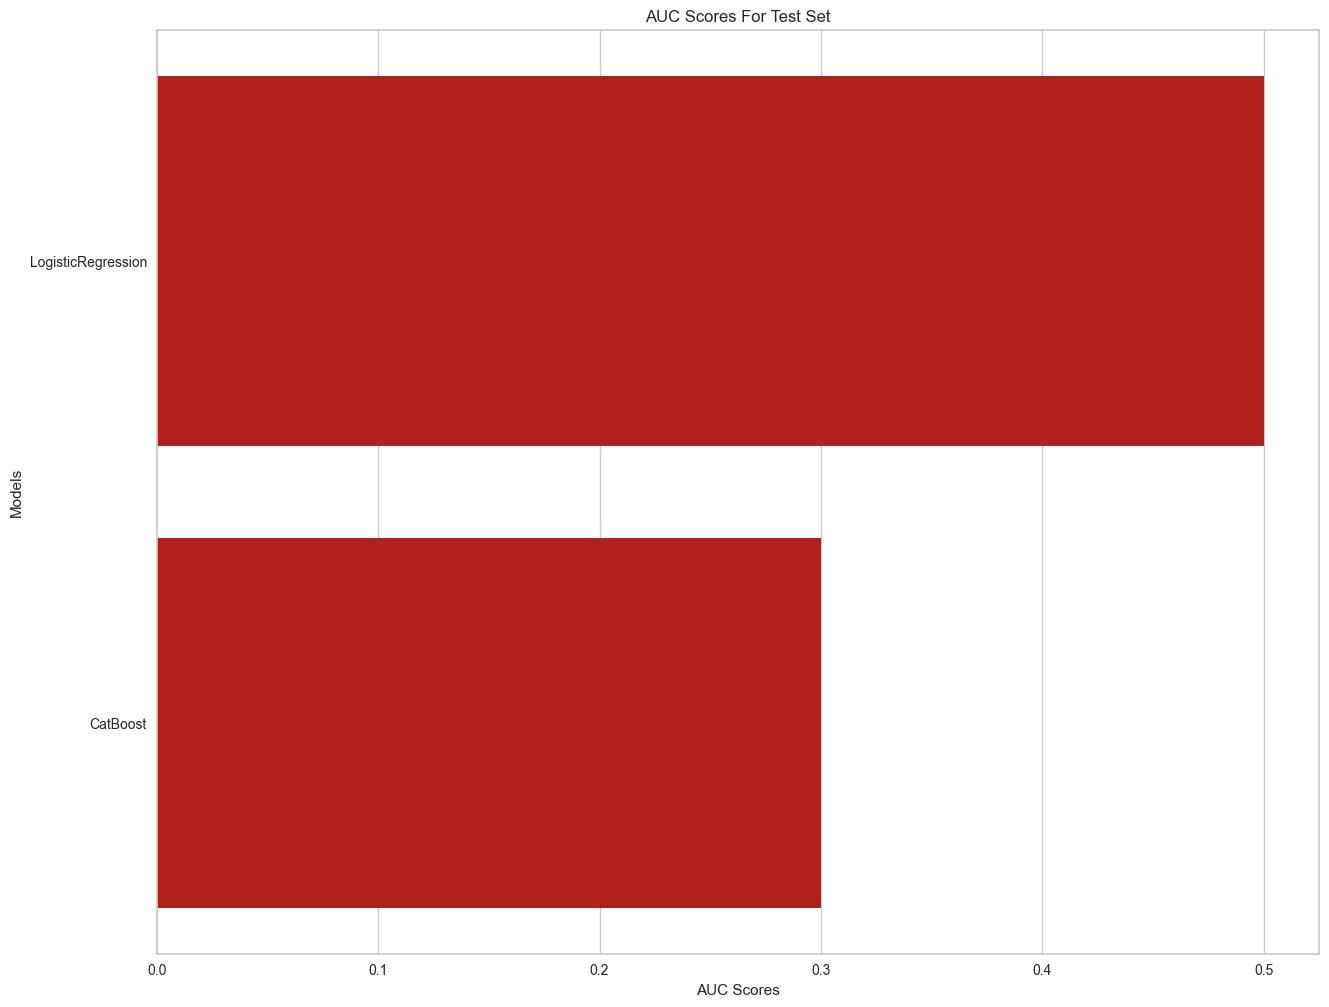

In [107]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
#                 ('RF', rf_tuned),
#                 ('XGBoost', xgb_tuned),
#                 ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
#                 ('SVM', svm_tuned),
#                 ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
#                 ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [108]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


NameError: name 'svm_tuned' is not defined

In [109]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [157]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [109]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--LR-stack73', Save_format = 'csv',Save_type = 'col')

In [111]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/RFE-RF-GB/LR")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [112]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [113]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split/ExternalTest-FS-ZSCORE-MI-LR.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [114]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/1-teston-xk/split"

In [115]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.57      0.74      0.65        27
    EGFR E21       0.71      0.53      0.61        32

    accuracy                           0.63        59
   macro avg       0.64      0.64      0.63        59
weighted avg       0.65      0.63      0.62        59

precision 0.7083333333333334 accuracy 0.6271186440677966 recall 0.53125 auc 0.6359953703703703


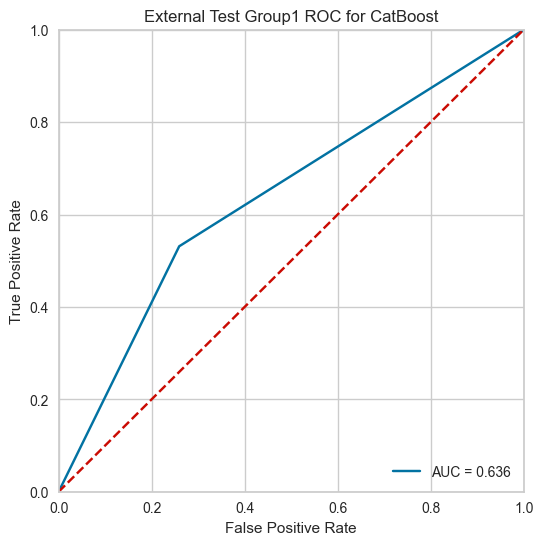

In [116]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [117]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  7]
 [15 17]]
Normalized confusion matrix
[[0.74 0.26]
 [0.47 0.53]]


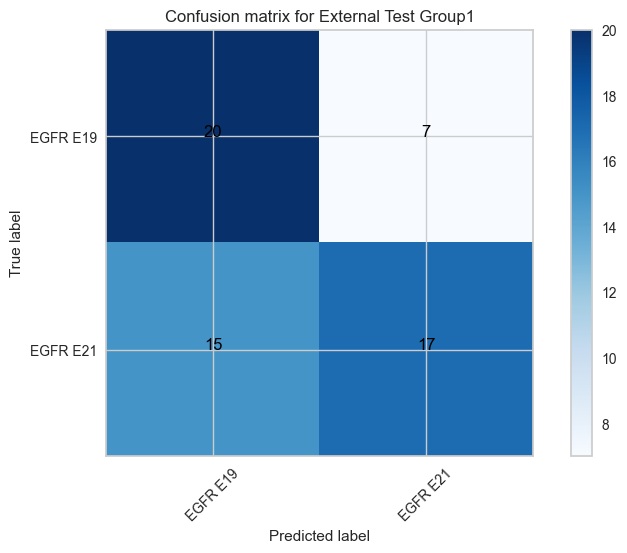

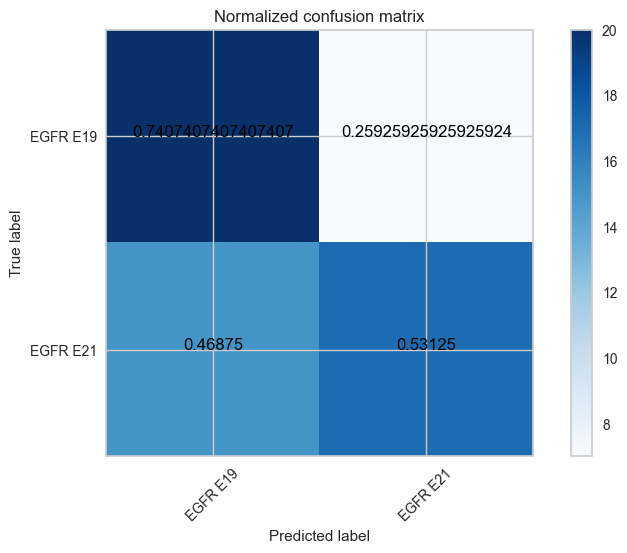

In [118]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [75]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.57      0.74      0.65        27
    EGFR E21       0.71      0.53      0.61        32

    accuracy                           0.63        59
   macro avg       0.64      0.64      0.63        59
weighted avg       0.65      0.63      0.62        59

precision 0.7083333333333334 accuracy 0.6271186440677966 recall 0.53125 auc 0.6359953703703703


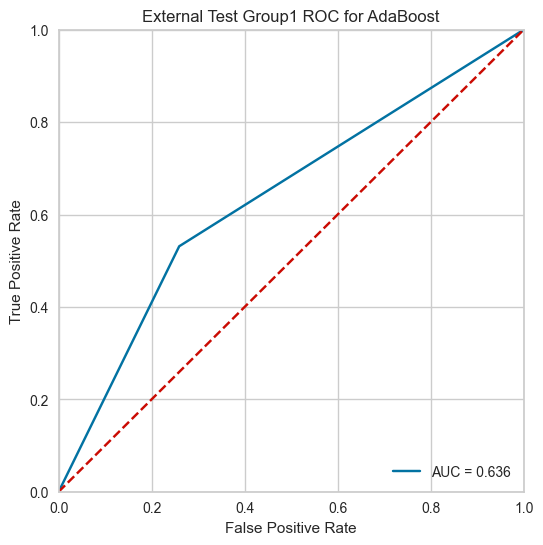

In [76]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [77]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  7]
 [15 17]]
Normalized confusion matrix
[[0.74 0.26]
 [0.47 0.53]]


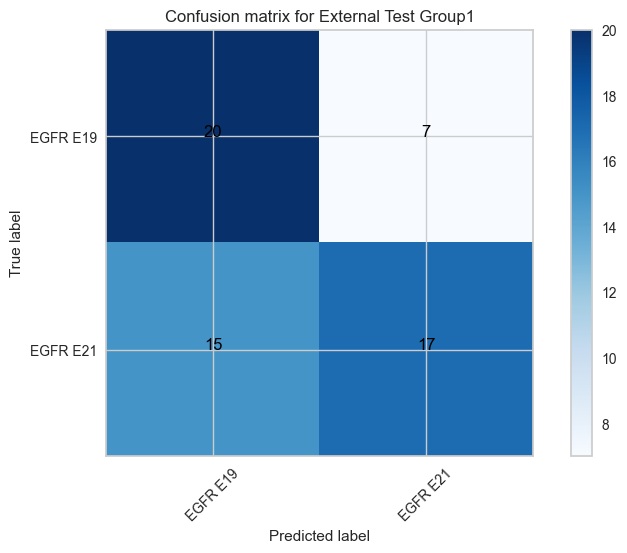

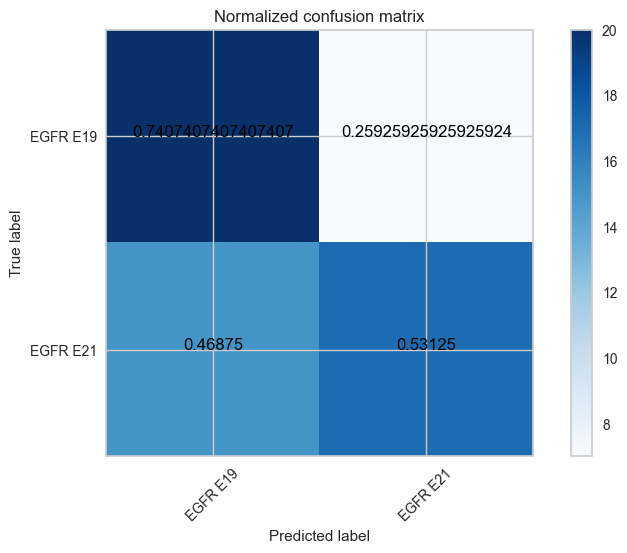

In [78]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [79]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR E19       0.49      0.67      0.56        27
    EGFR E21       0.59      0.41      0.48        32

    accuracy                           0.53        59
   macro avg       0.54      0.54      0.52        59
weighted avg       0.54      0.53      0.52        59

precision 0.5386977886977887 accuracy 0.5254237288135594 recall 0.5364583333333333 auc 0.5364583333333334


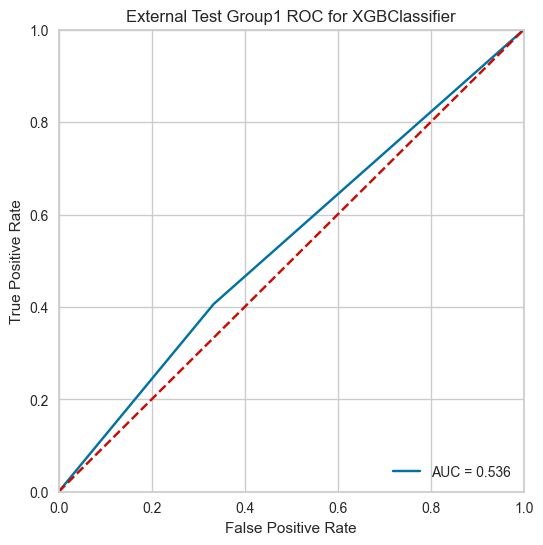

In [80]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [81]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18  9]
 [19 13]]
Normalized confusion matrix
[[0.67 0.33]
 [0.59 0.41]]


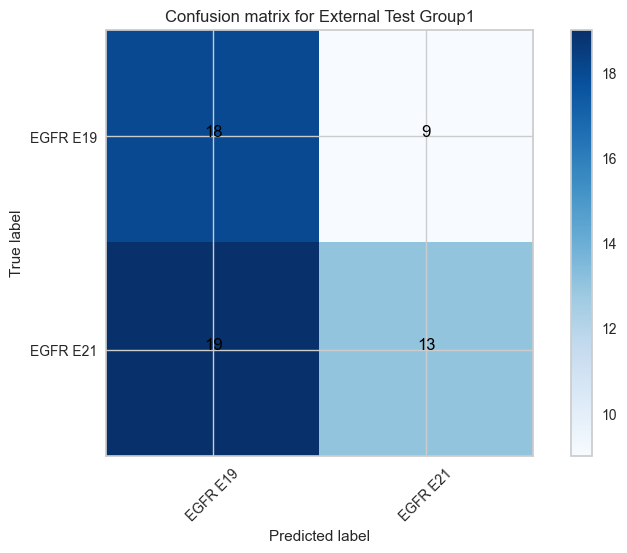

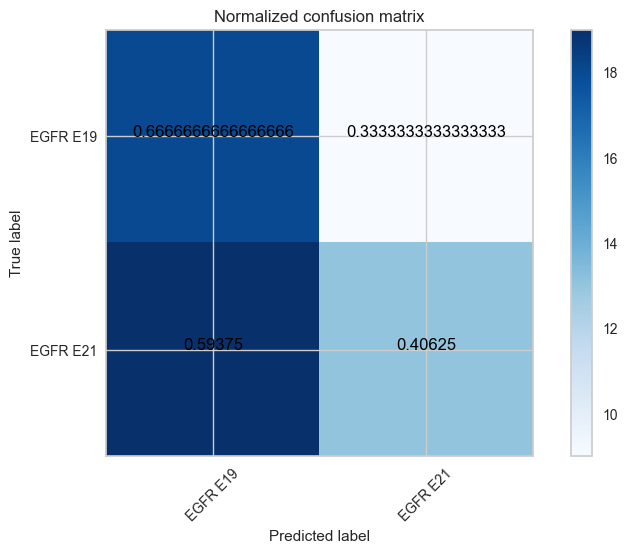

In [82]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [83]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.53      0.78      0.63        27
    EGFR E21       0.68      0.41      0.51        32

    accuracy                           0.58        59
   macro avg       0.60      0.59      0.57        59
weighted avg       0.61      0.58      0.56        59

precision 0.6842105263157895 accuracy 0.576271186440678 recall 0.40625 auc 0.5920138888888888


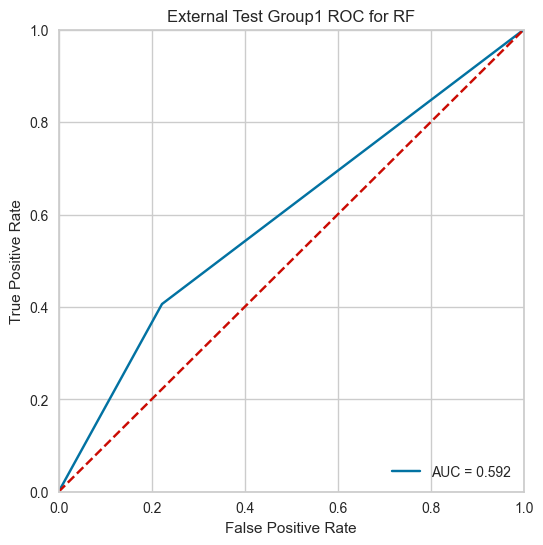

In [84]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[21  6]
 [19 13]]
Normalized confusion matrix
[[0.78 0.22]
 [0.59 0.41]]


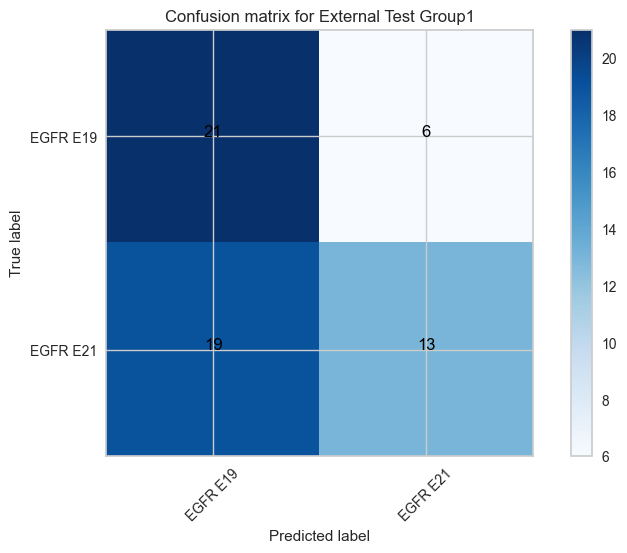

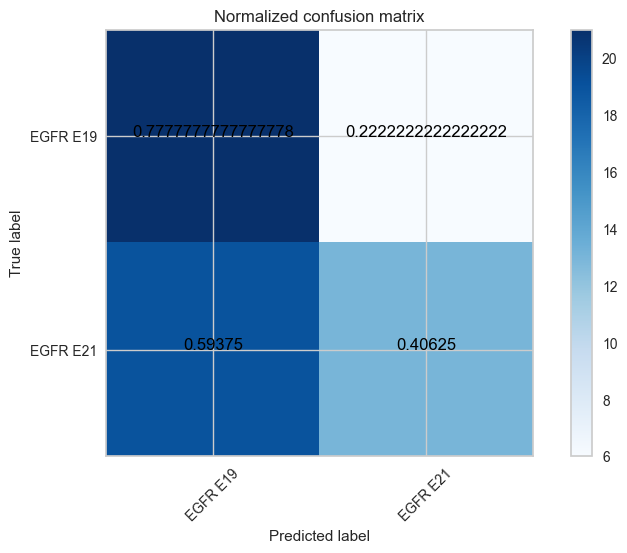

In [85]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [86]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.46      1.00      0.63        27
    EGFR E21       0.00      0.00      0.00        32

    accuracy                           0.46        59
   macro avg       0.23      0.50      0.31        59
weighted avg       0.21      0.46      0.29        59

precision 0.0 accuracy 0.4576271186440678 recall 0.0 auc 0.5


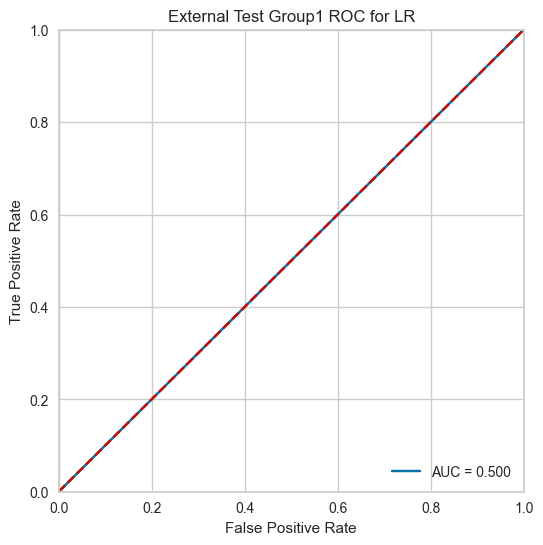

In [87]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[27  0]
 [32  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


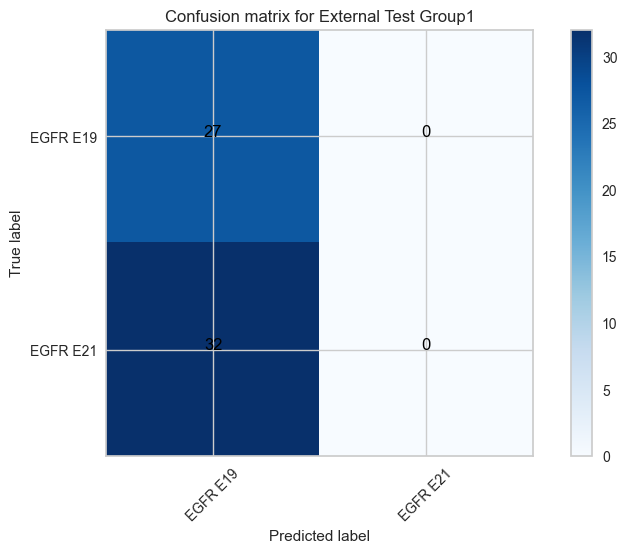

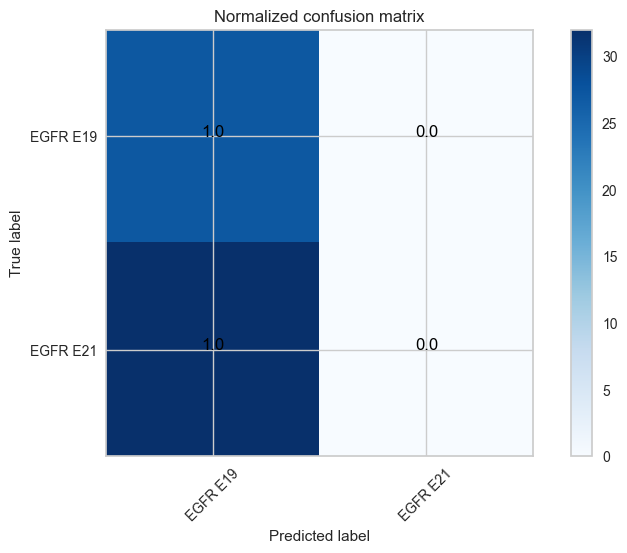

In [88]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [89]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.53      0.70      0.60        27
    EGFR E21       0.65      0.47      0.55        32

    accuracy                           0.58        59
   macro avg       0.59      0.59      0.57        59
weighted avg       0.60      0.58      0.57        59

precision 0.6521739130434783 accuracy 0.576271186440678 recall 0.46875 auc 0.5862268518518519


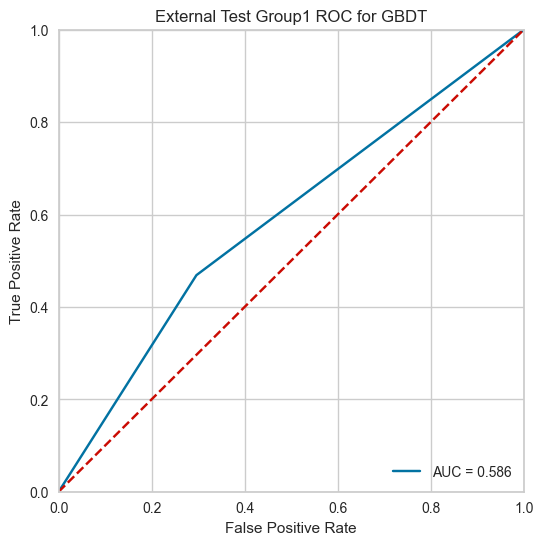

In [90]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[19  8]
 [17 15]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.53 0.47]]


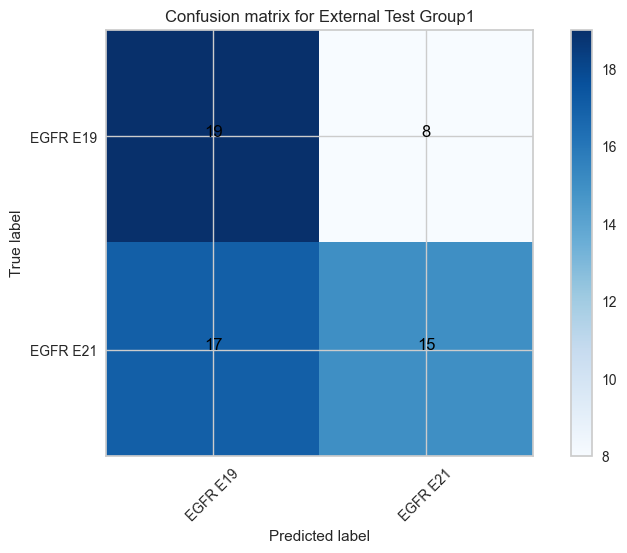

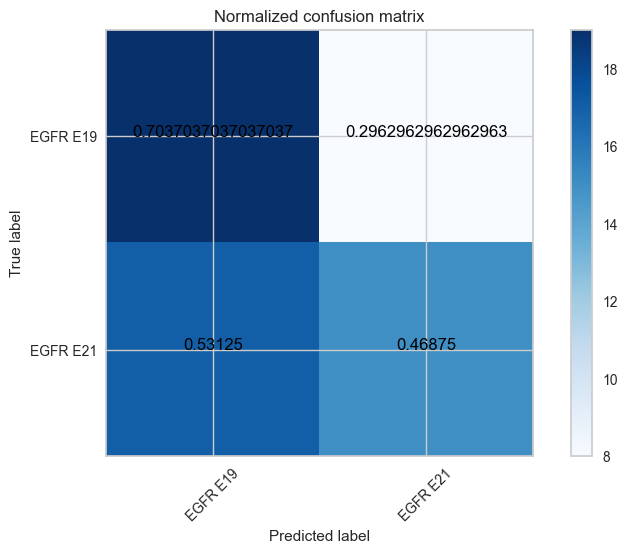

In [91]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [92]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/LR/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.63      0.56        27
    EGFR E21       0.60      0.47      0.53        32

    accuracy                           0.54        59
   macro avg       0.55      0.55      0.54        59
weighted avg       0.55      0.54      0.54        59

precision 0.6 accuracy 0.5423728813559322 recall 0.46875 auc 0.5491898148148149


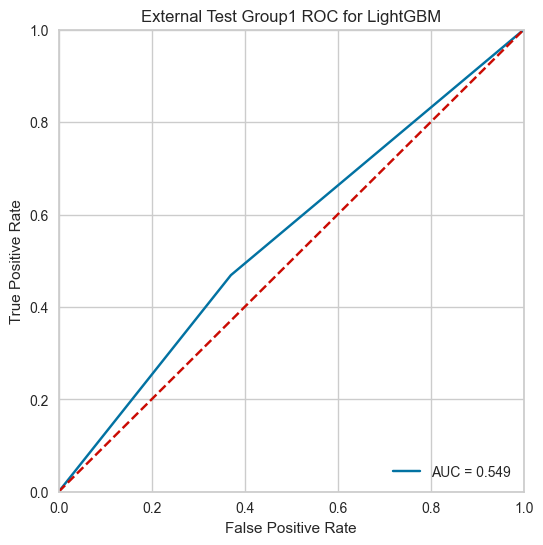

In [93]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[17 10]
 [17 15]]
Normalized confusion matrix
[[0.63 0.37]
 [0.53 0.47]]


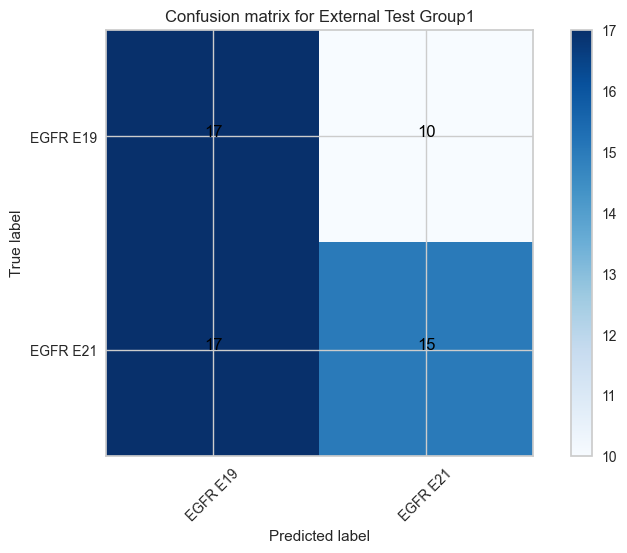

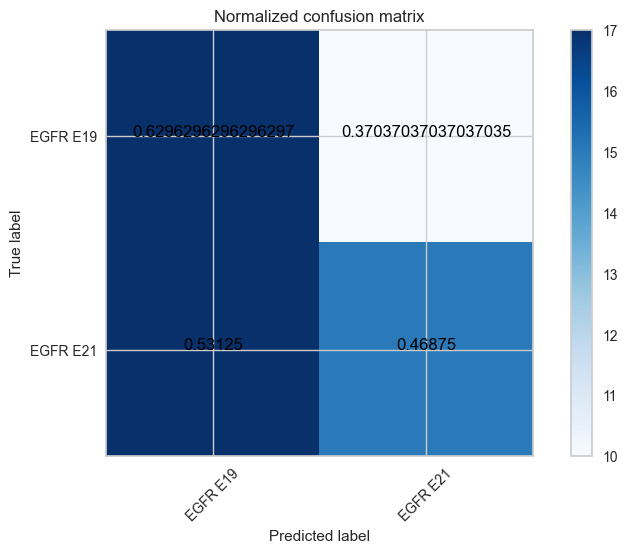

In [94]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()